# Capstone Project - Predicting Stock Prices Using Machine Learning 

## Part 1. Gathering Data from Yahoo Finance and Other Sources

## Objective:

We want to predict future movements of stock prices using trends from the previous years.
<br><br>
Price movements of stocks exhibit noises, fluctuations and volatility, due to a number of independent and dependent variables that influence the value of a certain stock in the market. Because of this complexity, it is very challenging to correctly predict their movement with great precision.
<br><br>
The primary questions we want to answer are: <br>
__"Is it feasible to forecast stock prices, given information about its recent prices over time, and in combination with other indicators, such as economic, technical and sentiment indicators?"__
<br><br>
and:
<br><br>
__"Can we maximise our investment return using machine-learning based trading strategy?__"
<br><br>
Our stakeholders are __ordinary everyday retail-traders__, who do not have access to or have enough understanding of complex financial data.
<br><br>
The business objective of this project is to:
- Maximise investment return based on forecast. Few points to consider are:
 - The forecasts have to be very accurate to the actual prices.
 - Minimal user intervention to the app (model) since the user is likely to be limited in computing resources and background knowledge.

The modelling objective of this project is to:
- gain insights from the dataset
- establish an architecture that can be used to predict medium- and long-term changes in stock prices
<br><br>
In this project, we describe our approach, from gathering the data, cleaning and manipulating the data and conducting exploratory data analysis to gain insights, and applying several machine learning algorithms to build the most accurate predictive model.


### Summary of the Dataset:

The dataset comprises of different datasets obtained from multiple sources.
<br><br>
The features can be divided into five categories:
1. __Stock Market Indices__ (S&P500, Dow Jones, Nikkei, FTSE100, Hang Seng, Treasury Bond)
2. __Commodity Prices__ (gold, silver, crude oil)
3. __Economic Indicators__ (GDP, Unemployment Rate, Consumer Price Index, Median Income)
4. __Technical Indicators__ (Volatility Index, Moving Average, Bollinger Bands, Relative Strength Index)
5. __Investor Sentiment__ (University of Michigan Consumer Sentiment, NYT Sentiment)

The time period for the data is from 1 Jan 1990 to 31 Dec 2019 (30 years).


### Datasets Used:

1. __From Yahoo Finance__:
- S&P500 index values (^GSPC)
- Dow Jones Industrial Average index value (^DJI)
- Nikkei values (^N225)
- London Exchange (Financial Times Stock Exchange 100) values (^FTSE)
- Hang Seng Index (^HSI)
- CBOE Volatility Index (^VIX)
- Treasury Yield 10 Years (^TNX)

2. __From Nasdaq, Alpha Vantage and Federal Reserve Economic Data API__:
- Gold Price
- Silver Price
- Crude Oil Price
- Gross Domestic Price
- Unemployment Rate
- Consumer Index
- Median Income
- University of Michigan Consumer Sentiment

3. __Technical Indicators Manually Created from the Data__:
- Moving Average
- Bollingers Band
- Relative Strength Index

4. __From New York Times API__:
- News Sentiment Analysis

### Defintions for Some of the Economic and Technical Indicators:

- S&P500, Dow Jones, Nikkei, FTSE 100, and Shanghai Index are major stock market indices indicating how well the stocks around the world are performing.
<br>
<br>
- __Chicago Board Options Exchange (CBOE) Volatility Index (VIX)__: A popular measure of the stock market's expectation of volatility based on S&P 500 index options. 
<br>
<br>
- __Treasury Yield 10 Years Bond__: Effective annual interest rate that the US government pays on one of its debt obligations, expressed as a percentage. It is the annual return investors can expect from holding a US government security with a given maturity. Because they are backed by the US government, Treasury securities are seen as a safer investment relative to stocks. In terms of its relationship to stock market, yields move in the opposite direction, meaning that falling stock prices boost yields, while rising stock prices lower yields. Yields are seen as a sign of investor sentiment about the economy - a rising yield indicates falling demand for Treasury bonds, as a result of investors preferring higher-risk, higher-reward investments. A falling yield suggests the opposite. 
<br>
<br>
- __Gross Domestic Product (GDP)__: GDP measures the output of all goods and services in an economy. As the stock market rises and falls, so too, does sentiment in the economy, either negatively or positively. In a bull market (stock prices rising), consumers and companies have more wealth and confidence, leading to more spending and higher GDP.
<br>
<br>
- __Consumer Price Index (CPI)__: An index that measures the monthly change in prices paid by U.S. consumers. It is one of the most popular measures of inflation and deflation. 
<br>
<br>
- __University of Michigan Consumer Sentiment Survey__: Illustrates the average US consumer's confidence level. The higher the confidence level, the more consumers are willing to spend money, and therefore increases stock prices, especially those stocks of car manufacturers, home builders, and other retailers.
<br>
<br>
- __Moving Average__: The mean or average of the specified data for a given set of consecutive periods. As new data becmes available, the mean of the data is computed by dropping the oldest value and adding the latest one. It can smoothen the short-term fluctuations and reduce the temporal variation in data.
<br>
<br>
- __Bollingers Band__: A volatility or standard deviation based oscillator which comprises of three components - middle band (moving average line), upper, and lower bands (usually tow standard deviations away from the middle band). As the volatility of the stock prices changes, the gap between the bands also changes. During more volatile markets the gap widens and amid low volatility conditions, the gap contracts.
<br>
<br>
-__Relative Strength Index__: A momentum oscillator to indicate overbrought (overvalued owing to excessive buying at unjustifiably high prices) and oversold (sold at a price below its true value) conditions in the market. It oscillates between 0 and 100 and its values are below a certain level. Typically, if the RSI line goes below 30, it indicates an oversold market whereas the RSI going over 70 indicates overbrought conditions.

## 1. Pre-Processing: Gathering, Cleaning and Manipulating Data

### 1.1 Import All Required Libraries

In [1]:
## Yahoo Finance Library will be used to gather historical values related to the stock market
import yfinance as yf

## Numpy and Pandas Libraries
import pandas as pd
import numpy as np

## Libraries for API
import requests
import json

## Miscellaneous Libraries
from datetime import datetime
import math
import pickle
import warnings
warnings.filterwarnings("ignore")
from tabulate import tabulate

## Standard Scaler
from sklearn.preprocessing import StandardScaler

## Data Visualisation Modules
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm, ListedColormap
from scipy.signal import savgol_filter
import plotly.graph_objects as go
import mplfinance as mpf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
## Graph Setting
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"

### 1.2 Import Data from Yahoo Finance Library

In [3]:
stock_list = ["^GSPC", "^DJI", "^N225", "^FTSE", "^HSI", "^VIX", "^TNX"]

In [4]:
## Helper function for gathering historical data and turning into dataframe
def get_yf_data(stock_name):
    stock = yf.Ticker(stock_name)
    data = stock.history(period="max")
    return data

In [5]:
## Get data for each index
sp500 = get_yf_data("^GSPC")
dji = get_yf_data("^DJI")
nikkei = get_yf_data("^N225")
ftse = get_yf_data("^FTSE")
hsi = get_yf_data("^HSI")
tnx = get_yf_data("^TNX")
vix = get_yf_data("^VIX")

In [6]:
sp500 = sp500[["Volume", "Open", "High", "Low", "Close", "Dividends", "Stock Splits"]]
## Rearranging the order of the columns

In [7]:
df_list = [dji, nikkei, ftse, hsi, tnx, vix, sp500]
df_list_name = ["Dow Jones", "Nikkei", "London Exchange", "Hang Seng", "Treasury Yield", "Volatility Index", "S&P 500"]
short_df_list_name = ["dji", "nikkei", "ftse", "hsi", "tnx", "vix", "sp500"]

In [8]:
for i in range(len(df_list)):
    print(f"Summary for {df_list_name[i]}:\n")
    df_list[i].info()
    print("=============================================")

Summary for Dow Jones:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7751 entries, 1992-01-02 to 2022-10-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7751 non-null   float64
 1   High          7751 non-null   float64
 2   Low           7751 non-null   float64
 3   Close         7751 non-null   float64
 4   Volume        7751 non-null   int64  
 5   Dividends     7751 non-null   int64  
 6   Stock Splits  7751 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 484.4 KB
Summary for Nikkei:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14205 entries, 1965-01-05 to 2022-10-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          14205 non-null  float64
 1   High          14205 non-null  float64
 2   Low           14205 non-null  float64
 3   Close         14205 non-null  float64
 4   Volu

Analysis:
- Most indices have data available from 1990 onwards, except Dow Jones, which will need to be rectified.
- For S&P 500, which is our primary data of interest, we will retain all features except "dividends" and "stock splits", so we end up with "open", "high", "low", "close", and "volume".
- For other indices, we will only extract "close" column, and ignore the rest.

We have gathered the missing two years (1990 - 1991) of data for Dow Jones Index in the form of csv files. We will update the dataframe for Dow Jones with these new data.

In [9]:
## Convert 1990 DJI data to Dataframe
dji1990 = pd.read_csv("dji1990.csv")
dji1990.Date = pd.to_datetime(dji1990.Date)
dji1990 = dji1990.sort_values(by="Date")

columns = [col for col in dji1990.columns if col != "Date"]

for col in columns:
    dji1990[col] = dji1990[col].str.replace(',', '').astype(float)
dji1990.set_index("Date", inplace=True)

## Convert 1991 DJI data to Dataframe
dji1991 = pd.read_csv("dji1991.csv")
dji1991.Date = pd.to_datetime(dji1991.Date)
dji1991 = dji1991.sort_values(by="Date")

for col in columns:
    dji1991[col] = dji1991[col].str.replace(',', '').astype(float)
dji1991.set_index("Date", inplace=True)

In [10]:
dji9091 = pd.concat([dji1990, dji1991])

In [11]:
dji = pd.concat([dji9091, dji])
dji.Close

Date
1990-01-02     2810.150000
1990-01-03     2809.730000
1990-01-04     2796.080000
1990-01-05     2773.250000
1990-01-08     2794.370000
                  ...     
2022-10-03    29490.890625
2022-10-04    30316.320312
2022-10-05    30273.869141
2022-10-06    29926.939453
2022-10-07    29296.789062
Name: Close, Length: 8257, dtype: float64

There are null values for volume, dividends and stock splits, but we won't concern ourselves with these values because we are not interested in these columns for our final dataframe.

In [12]:
df_list = [dji, nikkei, ftse, hsi, tnx, vix, sp500]

In [13]:
## Drop unnecessary columns for each dataframe
new_df_list = []
for i, df in enumerate(df_list):
    if df_list_name[i] == "S&P 500":
        df = df.drop(["Dividends", "Stock Splits"], axis = 1)
    else:
        df = df["Close"]
        df = df.rename(short_df_list_name[i]) 
    new_df_list.append(df)

In [14]:
yahoo_df = pd.concat(new_df_list, axis = 1) ## Concatenate all dataframes into a single df

In [15]:
## Change all columns into lower case
for column in yahoo_df.columns:
    yahoo_df.rename(columns = {column:column.lower()}, inplace = True)

Note: We will need to filter out data that are outside our range of interest (i.e. outside 1990 - 2009 period) but this will be done after when we have finished collecting data from other sources and concatenate with the main dataframe.

### 1.3 Import Data from NASDAQ API & Alpha Vantage API

In [16]:
## API keys
nasdaq_key = "rC5iQEiR52bRMgdtxdnh"
alpha_key = "40XFEFD7K4RRH3W8"
fred_key = "604473e68ad090adcb18bf168532fe1a"

## URL for Economic Indicators (mostly from Nasdaq)
url_list = ["WGC/GOLD_DAILY_USD",
            "LBMA/SILVER",
            "FRED/GDP",
            "FRED/UNEMPLOY",
            "FRED/MEHOINUSA672N"]

## URL for Alpha Vantage
cpi_url = f"https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey={alpha_key}" 

## URL for FRED
con_sentiment_url = f"https://api.stlouisfed.org/fred/series/observations?series_id=UMCSENT&api_key={fred_key}&file_type=json"
oil_url = f"https://api.stlouisfed.org/fred/series/observations?series_id=DCOILBRENTEU&api_key={fred_key}&file_type=json"

## Names of the datasets to be obtained from Nasdaq API
data_names = ["gold", "silver", "gdp", "unemploy", "med_income"]

In [17]:
## Helper function for connecting to NASDAQ and requesting data
def connect_nasdaq(url):
    nasdaq_url = f"https://www.quandl.com/api/v3/datasets/{url}.json?api_key={nasdaq_key}"
    r = requests.get(nasdaq_url)
    return r

In [18]:
## This function extracts data from NASDAQ json file and converts to a dataframe
def getNasdaqData(r, col_name):
    temp_json = r.json()
    temp_dict = {"date": [], col_name: []}
    
    for i in range(len(temp_json["dataset"]["data"])):
        temp_dict["date"].append(temp_json["dataset"]["data"][i][0])
        temp_dict[col_name].append(temp_json["dataset"]["data"][i][1])
    
    df = pd.DataFrame.from_dict(temp_dict)
    
    df.date = pd.to_datetime(df.date) ## Change the date datatype from string to datetime

    return df

In [19]:
## This function extracts data from Alpha Vantage json file and converts to a dataframe
def getAlphaData(r, col_name):
    temp_json = r.json()
    temp_dict = {"date": [], col_name: []}
    
    for i in range(len(temp_json["data"])):
        temp_dict["date"].append(temp_json["data"][i]["date"])
        temp_dict[col_name].append(float(temp_json["data"][i]["value"]))
    
    df = pd.DataFrame.from_dict(temp_dict)
    
    df.date = pd.to_datetime(df.date) ## Change the date datatype from string to datetime

    return df

In [20]:
## This function extracts data from FRED json file and converts to a dataframe
def getFREDData(r, col_name):
    temp_json = r.json()
    temp_dict = {"date": [], col_name: []}
    
    for i in range(len(temp_json["observations"])):
        temp_dict["date"].append(temp_json["observations"][i]["date"])
        temp_dict[col_name].append((temp_json["observations"][i]["value"]))
    
    df = pd.DataFrame.from_dict(temp_dict)
    
    df[col_name] = df[col_name].replace(".", 0)
    df[col_name] = df[col_name].apply(pd.to_numeric)
    
    df.date = pd.to_datetime(df.date) ## Change the date datatype from string to datetime

    return df

In [21]:
df_list = []

for i, url in enumerate(url_list):
    r = connect_nasdaq(url)
    df = getNasdaqData(r, data_names[i])
    df_list.append(df)

In [22]:
## Connect to Alpha Vantage CPI for CPI data
cpi_r = requests.get(cpi_url)
cpi_df = getAlphaData(cpi_r, "cpi")
df_list.append(cpi_df)

In [23]:
## Connect to FRED API for University of Michigan Consumer Sentiment Index & Crude Oil data
con_sentiment_r = requests.get(con_sentiment_url)
con_sentiment_df = getFREDData(con_sentiment_r, "con_sentiment")
df_list.append(con_sentiment_df)

oil_r = requests.get(oil_url)
oil_df = getFREDData(oil_r, "oil")
oil_df[oil_df.oil == 0]

date  oil
18   1987-06-15  0.0
157  1987-12-25  0.0
162  1988-01-01  0.0
166  1988-01-07  0.0
179  1988-01-26  0.0
...         ...  ...
9108 2022-04-18  0.0
9118 2022-05-02  0.0
9141 2022-06-02  0.0
9203 2022-08-29  0.0
9218 2022-09-19  0.0

[250 rows x 2 columns]

There are zero values in the oil dataframe, which needs to be replaced with null values, so they can be easily filled with appropriate values later using forward and backward fills.

In [24]:
oil_df.oil = oil_df.oil.replace(0, np.nan)

In [25]:
df_list.append(oil_df)

In [26]:
df_list ## Check dataframe

[            date     gold
 0     2020-03-13  1562.80
 1     2020-03-12  1570.70
 2     2020-03-11  1653.75
 3     2020-03-10  1655.70
 4     2020-03-09  1672.50
 ...          ...      ...
 10782 1971-01-01    37.40
 10783 1970-10-01    36.20
 10784 1970-07-01    35.40
 10785 1970-04-01    35.10
 10786 1970-01-01    35.20
 
 [10787 rows x 2 columns],
             date  silver
 0     2022-10-07  20.625
 1     2022-10-06  20.540
 2     2022-10-05  20.435
 3     2022-10-04  20.925
 4     2022-10-03  19.415
 ...          ...     ...
 13847 1968-01-08   2.163
 13848 1968-01-05   2.157
 13849 1968-01-04   2.171
 13850 1968-01-03   2.225
 13851 1968-01-02   2.173
 
 [13852 rows x 2 columns],
           date        gdp
 0   2021-10-01  23992.355
 1   2021-07-01  23202.344
 2   2021-04-01  22740.959
 3   2021-01-01  22038.226
 4   2020-10-01  21477.597
 ..         ...        ...
 295 1948-01-01    265.742
 296 1947-10-01    259.745
 297 1947-07-01    249.585
 298 1947-04-01    245.968
 299 1947

In [27]:
for df in df_list:
    df.set_index("date", inplace = True) ## Set the date as index

In [28]:
api_df = pd.concat(df_list, axis = 1)

In [29]:
api_df ## Check dataframe

gold  silver  gdp  unemploy  med_income  cpi  con_sentiment    oil
date                                                                          
1913-01-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN    NaN
1913-02-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN    NaN
1913-03-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN    NaN
1913-04-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN    NaN
1913-05-01   NaN     NaN  NaN       NaN         NaN  9.7            NaN    NaN
...          ...     ...  ...       ...         ...  ...            ...    ...
2022-10-03   NaN  19.415  NaN       NaN         NaN  NaN            NaN  90.68
2022-10-04   NaN  20.925  NaN       NaN         NaN  NaN            NaN    NaN
2022-10-05   NaN  20.435  NaN       NaN         NaN  NaN            NaN    NaN
2022-10-06   NaN  20.540  NaN       NaN         NaN  NaN            NaN    NaN
2022-10-07   NaN  20.625  NaN       NaN         NaN  NaN            NaN    NaN

[15073 rows x 8 columns]

### 1.4 Generate Technical Indicator Features

Note: 
The source code for generating technical indicators are from quantinsti.com and have been modified for this project.

#### 1.4.1 Moving Average

In [30]:
# Helper Function for Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(data['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

In [31]:
# Helper Function for Exponentially-weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(data['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

In [32]:
# Compute the 50-day SMA
n = 50
SMA = SMA(sp500,n)
SMA = SMA.dropna()
SMA = SMA['SMA']

In [33]:
SMA

Date
1950-03-15      17.066200
1950-03-16      17.082800
1950-03-17      17.094800
1950-03-20      17.105000
1950-03-21      17.114400
                 ...     
2022-10-03    4006.010630
2022-10-04    4002.492427
2022-10-05    3999.737026
2022-10-06    3994.155225
2022-10-07    3985.499824
Name: SMA, Length: 18262, dtype: float64

In [34]:
# Compute the 200-day EWMA
ew = 200
EWMA = EWMA(sp500,ew)
EWMA = EWMA.dropna()
EWMA = EWMA['EWMA_200']

In [35]:
SMA

Date
1950-03-15      17.066200
1950-03-16      17.082800
1950-03-17      17.094800
1950-03-20      17.105000
1950-03-21      17.114400
                 ...     
2022-10-03    4006.010630
2022-10-04    4002.492427
2022-10-05    3999.737026
2022-10-06    3994.155225
2022-10-07    3985.499824
Name: SMA, Length: 18262, dtype: float64

#### 1.4.2 Bollinger Bands

In [36]:
# Helper Function to Compute the Bollinger Bands 
def BBANDS(data, window=n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    data['Gap'] = data["UpperBand"] - data["LowerBand"]
    bbands = data[["UpperBand", "LowerBand", "Gap"]]
    return bbands

In [37]:
n = 50
BBANDS = BBANDS(sp500, n)

In [38]:
BBANDS

UpperBand    LowerBand         Gap
Date                                            
1950-01-03          NaN          NaN         NaN
1950-01-04          NaN          NaN         NaN
1950-01-05          NaN          NaN         NaN
1950-01-06          NaN          NaN         NaN
1950-01-09          NaN          NaN         NaN
...                 ...          ...         ...
2022-10-03  4392.514241  3619.507019  773.007222
2022-10-04  4393.626126  3611.358727  782.267399
2022-10-05  4395.130382  3604.343671  790.786711
2022-10-06  4396.000236  3592.310213  803.690024
2022-10-07  4398.939059  3572.060589  826.878470

[18311 rows x 3 columns]

In [39]:
BBANDS.rename(columns = {"UpperBand":"upper_band",
                         "LowerBand":"lower_band",
                         "Gap": "band_gap"}, inplace = True)

#### 1.4.3 Relative Strength Index

In [40]:
# Helper Function for Calculating RSI values
def rsi(close, periods = 14):
    
    close_delta = close.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    rsi = pd.Series(rsi, name = 'RSI') 
    return rsi

In [41]:
# Compute the RSI
RSI = rsi(sp500["Close"])
RSI = RSI.dropna()
RSI 

Date
1950-01-23    58.876058
1950-01-24    53.899587
1950-01-25    45.598177
1950-01-26    44.976503
1950-01-27    51.398664
                ...    
2022-10-03    37.649536
2022-10-04    46.597030
2022-10-05    46.112447
2022-10-06    43.636333
2022-10-07    37.733146
Name: RSI, Length: 18297, dtype: float64

#### 1.4.4 Concatenate Technical Indicators to a Single Dataframe

In [42]:
tech_df = pd.concat([SMA, EWMA, BBANDS, RSI], axis = 1) ## Concatenate all dataframes into a single df

In [43]:
tech_df

SMA     EWMA_200   upper_band   lower_band    band_gap  \
Date                                                                         
1950-01-03          NaN          NaN          NaN          NaN         NaN   
1950-01-04          NaN          NaN          NaN          NaN         NaN   
1950-01-05          NaN          NaN          NaN          NaN         NaN   
1950-01-06          NaN          NaN          NaN          NaN         NaN   
1950-01-09          NaN          NaN          NaN          NaN         NaN   
...                 ...          ...          ...          ...         ...   
2022-10-03  4006.010630  4113.163451  4392.514241  3619.507019  773.007222   
2022-10-04  4002.492427  4109.957147  4393.626126  3611.358727  782.267399   
2022-10-05  3999.737026  4106.706628  4395.130382  3604.343671  790.786711   
2022-10-06  3994.155225  4103.102782  4396.000236  3592.310213  803.690024   
2022-10-07  3985.499824  4098.491410  4398.939059  3572.060589  826.878470   

                  RSI  
Date                   
1950-01-03        NaN  
1950-01-04        NaN  
1950-01-05        NaN  
1950-01-06        NaN  
1950-01-09        NaN  
...               ...  
2022-10-03  37.649536  
2022-10-04  46.597030  
2022-10-05  46.112447  
2022-10-06  43.636333  
2022-10-07  37.733146  

[18311 rows x 6 columns]

### 1.5 Import Pickled Dataframes from Sentiment Analysis

In [44]:
## Import the dataframe
df_9099 = pd.read_pickle("df_9099.pkl") 
df_9099_score = pd.read_pickle("df_9099_score.pkl") 

df_0009 = pd.read_pickle("df_0009.pkl") 
df_0009_score = pd.read_pickle("df_0009_score.pkl") 

df_1019 = pd.read_pickle("df_1019.pkl") 
df_1019_score = pd.read_pickle("df_1019_score.pkl") 

In [45]:
df_1019.iloc[-1]

date                                                      2019-12-27
original           Three Federal Reserve rate cuts and a rally in...
texts              [federal, reserve, rate, cut, rally, huge, tec...
shorts             federal reserve rate cut rally huge tech stock...
sentiment_score                                             0.299592
Name: 2192, dtype: object

In [46]:
sentiment_df = pd.concat([df_9099_score, df_0009_score, df_1019_score])

In [47]:
sentiment_df.index = pd.to_datetime(sentiment_df.index)

In [48]:
class_list = []

for i in sentiment_df.iloc[:,0]:
    if i >= 0.1:
        class_list.append(1)
    elif i <= -0.1:
        class_list.append(-1)
    else:
        class_list.append(0)
        
sentiment_df["label"] = class_list ## Create a new df column called class and add the values

### 1.6 Concatenate All Dataframes

In [49]:
df = pd.concat([api_df, tech_df, sentiment_df.label, yahoo_df], axis = 1) ## Combine Yahoo Finance Data and API Data into a single dataframe

In [50]:
df ## Check dataframe

gold  silver  gdp  unemploy  med_income  cpi  con_sentiment  oil  \
1913-01-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-02-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-03-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-04-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-05-01   NaN     NaN  NaN       NaN         NaN  9.7            NaN  NaN   
...          ...     ...  ...       ...         ...  ...            ...  ...   
2022-10-04   NaN  20.925  NaN       NaN         NaN  NaN            NaN  NaN   
2022-10-05   NaN  20.435  NaN       NaN         NaN  NaN            NaN  NaN   
2022-10-06   NaN  20.540  NaN       NaN         NaN  NaN            NaN  NaN   
2022-10-07   NaN  20.625  NaN       NaN         NaN  NaN            NaN  NaN   
2022-10-10   NaN     NaN  NaN       NaN         NaN  NaN            NaN  NaN   

                    SMA     EWMA_200  ...        nikkei         ftse  \
1913-01-01          NaN          NaN  ...           NaN          NaN   
1913-02-01          NaN          NaN  ...           NaN          NaN   
1913-03-01          NaN          NaN  ...           NaN          NaN   
1913-04-01          NaN          NaN  ...           NaN          NaN   
1913-05-01          NaN          NaN  ...           NaN          NaN   
...                 ...          ...  ...           ...          ...   
2022-10-04  4002.492427  4109.957147  ...  26992.210938  7086.500000   
2022-10-05  3999.737026  4106.706628  ...  27120.529297  7052.600098   
2022-10-06  3994.155225  4103.102782  ...  27311.300781  6997.299805   
2022-10-07  3985.499824  4098.491410  ...  27116.109375  6991.100098   
2022-10-10          NaN          NaN  ...           NaN          NaN   

                     hsi    tnx        vix        volume         open  \
1913-01-01           NaN    NaN        NaN           NaN          NaN   
1913-02-01           NaN    NaN        NaN           NaN          NaN   
1913-03-01           NaN    NaN        NaN           NaN          NaN   
1913-04-01           NaN    NaN        NaN           NaN          NaN   
1913-05-01           NaN    NaN        NaN           NaN          NaN   
...                  ...    ...        ...           ...          ...   
2022-10-04           NaN  3.617  29.070000  5.146580e+09  3726.459961   
2022-10-05  18087.970703  3.759  28.549999  4.293180e+09  3753.250000   
2022-10-06  18012.150391  3.826  30.520000  4.252100e+09  3771.969971   
2022-10-07  17740.050781  3.883  31.360001  4.449660e+09  3706.739990   
2022-10-10  17358.109375    NaN        NaN           NaN          NaN   

                   high          low        close  
1913-01-01          NaN          NaN          NaN  
1913-02-01          NaN          NaN          NaN  
1913-03-01          NaN          NaN          NaN  
1913-04-01          NaN          NaN          NaN  
1913-05-01          NaN          NaN          NaN  
...                 ...          ...          ...  
2022-10-04  3791.919922  3726.459961  3790.929932  
2022-10-05  3806.909912  3722.659912  3783.280029  
2022-10-06  3797.929932  3739.219971  3744.520020  
2022-10-07  3706.739990  3620.729980  3639.659912  
2022-10-10          NaN          NaN          NaN  

[21373 rows x 26 columns]

In [51]:
df.isnull().sum()

gold             10586
silver            7540
gdp              21073
unemploy         20484
med_income       21336
cpi              20057
con_sentiment    20535
oil              12394
SMA               3111
EWMA_200          3260
upper_band        3111
lower_band        3111
band_gap          3111
RSI               3076
label            13981
dji              13116
nikkei            7168
ftse             11580
hsi              12539
tnx               6169
vix              13116
volume            3062
open              3062
high              3062
low               3062
close             3062
dtype: int64

In [52]:
df.columns 

Index(['gold', 'silver', 'gdp', 'unemploy', 'med_income', 'cpi',
       'con_sentiment', 'oil', 'SMA', 'EWMA_200', 'upper_band', 'lower_band',
       'band_gap', 'RSI', 'label', 'dji', 'nikkei', 'ftse', 'hsi', 'tnx',
       'vix', 'volume', 'open', 'high', 'low', 'close'],
      dtype='object')

In [53]:
df.head()

gold  silver  gdp  unemploy  med_income  cpi  con_sentiment  oil  \
1913-01-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-02-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-03-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-04-01   NaN     NaN  NaN       NaN         NaN  9.8            NaN  NaN   
1913-05-01   NaN     NaN  NaN       NaN         NaN  9.7            NaN  NaN   

            SMA  EWMA_200  ...  nikkei  ftse  hsi  tnx  vix  volume  open  \
1913-01-01  NaN       NaN  ...     NaN   NaN  NaN  NaN  NaN     NaN   NaN   
1913-02-01  NaN       NaN  ...     NaN   NaN  NaN  NaN  NaN     NaN   NaN   
1913-03-01  NaN       NaN  ...     NaN   NaN  NaN  NaN  NaN     NaN   NaN   
1913-04-01  NaN       NaN  ...     NaN   NaN  NaN  NaN  NaN     NaN   NaN   
1913-05-01  NaN       NaN  ...     NaN   NaN  NaN  NaN  NaN     NaN   NaN   

            high  low  close  
1913-01-01   NaN  NaN    NaN  
1913-02-01   NaN  NaN    NaN  
1913-03-01   NaN  NaN    NaN  
1913-04-01   NaN  NaN    NaN  
1913-05-01   NaN  NaN    NaN  

[5 rows x 26 columns]

In [54]:
print(df.info())
print(f"\n Number of null values in each column: \n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21373 entries, 1913-01-01 to 2022-10-10
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gold           10787 non-null  float64
 1   silver         13833 non-null  float64
 2   gdp            300 non-null    float64
 3   unemploy       889 non-null    float64
 4   med_income     37 non-null     float64
 5   cpi            1316 non-null   float64
 6   con_sentiment  838 non-null    float64
 7   oil            8979 non-null   float64
 8   SMA            18262 non-null  float64
 9   EWMA_200       18113 non-null  float64
 10  upper_band     18262 non-null  float64
 11  lower_band     18262 non-null  float64
 12  band_gap       18262 non-null  float64
 13  RSI            18297 non-null  float64
 14  label          7392 non-null   float64
 15  dji            8257 non-null   float64
 16  nikkei         14205 non-null  float64
 17  ftse           9793 non-null   fl

There are many null values, especially those data that are reported monthly, quarterly or yearly. These values will be fixed in the next section.

### 1.7 Slice the Dataframe to Fit Between Start and End Dates, and Fix Null Values

In [58]:
## Set the start and end dates, and create a mask to mask the values that are within the set dates.
start_date = "1990-1-1"
end_date = "2019-12-31"

mask = (df.index >= start_date) & (df.index <= end_date)

df = df.loc[mask]

_Note_:<br><br>
There are significant number of null values, especially for economic indicators.
We will use a combination of forward fill and backward fill methods to replace the null values.
(Using forward fill means that a value on a particular day carries on to the next day and onwards until there is a new value recorded. Backward fill will fill null values that are before the first recorded value. Using this method assumes that the values before the first recorded value did not change.)

In [59]:
df = df.fillna(method = "ffill")
df = df.fillna(method = "bfill")

df.isnull().sum() ## Check to see if all null values have been replaced.

gold             0
silver           0
gdp              0
unemploy         0
med_income       0
cpi              0
con_sentiment    0
oil              0
SMA              0
EWMA_200         0
upper_band       0
lower_band       0
band_gap         0
RSI              0
label            0
dji              0
nikkei           0
ftse             0
hsi              0
tnx              0
vix              0
volume           0
open             0
high             0
low              0
close            0
dtype: int64

All null values have now been replaced.

In [60]:
df ## Check to see all columns and values are there

gold  silver        gdp  unemploy  med_income      cpi  \
1990-01-01   398.60   5.210   5872.701    6752.0     57677.0  127.400   
1990-01-02   399.00   5.210   5872.701    6752.0     57677.0  127.400   
1990-01-03   395.00   5.160   5872.701    6752.0     57677.0  127.400   
1990-01-04   396.50   5.196   5872.701    6752.0     57677.0  127.400   
1990-01-05   405.00   5.280   5872.701    6752.0     57677.0  127.400   
...             ...     ...        ...       ...         ...      ...   
2019-12-25  1482.10  17.585  21694.458    5861.0     69560.0  256.974   
2019-12-26  1482.10  17.585  21694.458    5861.0     69560.0  256.974   
2019-12-27  1511.50  17.825  21694.458    5861.0     69560.0  256.974   
2019-12-30  1514.75  17.825  21694.458    5861.0     69560.0  256.974   
2019-12-31  1514.75  18.045  21694.458    5861.0     69560.0  256.974   

            con_sentiment    oil          SMA     EWMA_200  ...        nikkei  \
1990-01-01           93.0  21.20   344.046799   331.337663  ...  38712.878906   
1990-01-02           93.0  21.20   344.046799   331.337663  ...  38712.878906   
1990-01-03           93.0  22.65   344.278799   331.610522  ...  38712.878906   
1990-01-04           93.0  22.50   344.495599   331.849920  ...  38712.878906   
1990-01-05           93.0  23.13   344.665599   332.052408  ...  38274.761719   
...                   ...    ...          ...          ...  ...           ...   
2019-12-25           99.3  69.26  3100.961187  2969.966261  ...  23782.869141   
2019-12-26           99.3  69.26  3105.845786  2972.652267  ...  23924.919922   
2019-12-27           99.3  68.91  3110.852388  2975.312643  ...  23837.720703   
2019-12-30           99.3  68.30  3115.319189  2977.760179  ...  23656.619141   
2019-12-31           99.3  67.77  3120.210791  2980.277790  ...  23656.619141   

                   ftse           hsi    tnx        vix        volume  \
1990-01-01  2434.100098   2838.100098  7.940  17.240000  1.620700e+08   
1990-01-02  2434.100098   2838.100098  7.940  17.240000  1.620700e+08   
1990-01-03  2463.699951   2858.699951  7.990  18.190001  1.923300e+08   
1990-01-04  2451.600098   2868.000000  7.980  19.219999  1.770000e+08   
1990-01-05  2444.500000   2839.899902  7.990  20.110001  1.585300e+08   
...                 ...           ...    ...        ...           ...   
2019-12-25  7632.200195  27864.210938  1.910  12.670000  1.296540e+09   
2019-12-26  7632.200195  27864.210938  1.905  12.650000  2.160680e+09   
2019-12-27  7644.899902  28225.419922  1.874  13.430000  2.428670e+09   
2019-12-30  7587.100098  28319.390625  1.895  14.820000  3.013290e+09   
2019-12-31  7542.399902  28189.750000  1.919  13.780000  2.893810e+09   

                   open         high          low        close  
1990-01-01   353.399994   359.690002   351.980011   359.690002  
1990-01-02   353.399994   359.690002   351.980011   359.690002  
1990-01-03   359.690002   360.589996   357.890015   358.760010  
1990-01-04   358.760010   358.760010   352.890015   355.670013  
1990-01-05   355.670013   355.670013   351.350006   352.200012  
...                 ...          ...          ...          ...  
2019-12-25  3225.449951  3226.429932  3220.510010  3223.379883  
2019-12-26  3227.199951  3240.080078  3227.199951  3239.909912  
2019-12-27  3247.229980  3247.929932  3234.370117  3240.020020  
2019-12-30  3240.090088  3240.919922  3216.570068  3221.290039  
2019-12-31  3215.179932  3231.719971  3212.030029  3230.780029  

[9757 rows x 26 columns]

In [61]:
df.shape

(9757, 26)

In [62]:
df.columns

Index(['gold', 'silver', 'gdp', 'unemploy', 'med_income', 'cpi',
       'con_sentiment', 'oil', 'SMA', 'EWMA_200', 'upper_band', 'lower_band',
       'band_gap', 'RSI', 'label', 'dji', 'nikkei', 'ftse', 'hsi', 'tnx',
       'vix', 'volume', 'open', 'high', 'low', 'close'],
      dtype='object')

__Units for Each Feature__:<br><br>
1. Gold = USD
2. Silver = USD
3. Oil = USD
4. GDP = Billions of Dollars
5. Unemployment Rate = Thousands of Persons
6. Median Income = USD
7. CPI = Index 1982 - 1984 = 100
8. Consumer Sentiment = Index 1966:Q1 = 100
9. SMA = Index
10. EWMA_200 = Index
11. Upper Band = Index
12. Lower Band = Index
13. Band Gap = Index
14. RSI = No Unit
15. Sentiment Score = No Unit
16. DJI = Index
17. Nikkei = Index
18. FTSE = Index
19. HSI = Index
20. TNX = Percent
21. VIX = Index
22. Volume = Shares
23. Open = Index
24. High = Index
25. Low = Index
26. Close = Index

## 2. Exploratory Data Analysis

In [63]:
## Gather Recession Data for Plotting
## URL for FRED
recession_url = f"https://api.stlouisfed.org/fred/series/observations?series_id=USRECD&api_key={fred_key}&file_type=json"

## Connect to FRED API for recession data
recession_r = requests.get(recession_url)
recession_df = getFREDData(recession_r, "recession")

## Slice the dataframe to fit within the desired timeframe
mask = (recession_df.date >= start_date) & (recession_df.date <= end_date)
recession_df = recession_df.loc[mask]
recession_df.set_index("date", inplace=True)

### 2.1 Helper Functions for Plotting Graphs

In [64]:
def ohlc(col_name, col_name2, unit = "Index"):
    ## This function is only used once in this project but can be used for other instances
    ## for analysing other stocks
    plt.clf()
    
    ## Plot Settings
    fig, axes = plt.subplots(2,1, figsize = (14,8))
    plt.rcParams['font.size'] = 20
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['figure.facecolor'] = "white"
    plt.rcParams['axes.facecolor'] = "white"
    sns.set_theme(style='ticks', font_scale=1.4)
    
    fig.suptitle(f"Time vs {col_name.upper()} and {col_name2.upper()} from 1990 to 2020",
                 fontsize = 20)
    x = df.index
    rx = recession_df.index
    
    for i in range(2):
        if i == 0:
            y = df.close 
            y2 = df.open
            ymax = y.max()
        
            n = int(math.log10(ymax))
            num = 10**n
            ymax = int(ymax/num)*num + num  
        
            high = df.high
            low = df.low
        
            lw = 3
            axes[i].plot(x, y, 'b', label='CLOSE', lw=lw)
            axes[i].fill_between(x, low, high, color='g', lw = 0.5, alpha=0.5)
            
            axes[0].plot(x, y2, 'r', label='OPEN', lw=lw, alpha= 0.7)
            
            axes[0].legend(fontsize=18)
        
        else:
            y = df.volume/1_000_000_000
            ymax = y.max()

            n = int(math.log10(ymax))
            num = 10**n
            ymax = int(ymax/num)*num + num if ymax - y.max() > num else int(ymax/num)*num + num/3

            y.plot.area(ax=axes[i], alpha=0.9, lw = 0.2)

        ry = recession_df.recession * ymax
        axes[i].fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
        axes[i].plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")

        axes[i].set_ylim((0,ymax)) 
        axes[i].set_xlim(df.index[0])

        axes[i].xaxis.set_major_locator(mdates.YearLocator(base=5))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    
        m = ymax/num if i == 0 else 3
        axes[i].yaxis.set_major_locator(plt.MaxNLocator(m))
    
        axes[i].grid(True, which='both')
        sns.despine(ax=axes[i], offset=0)
        
        txt = f"{col_name.upper()} ({unit})" if i == 0 else f"Volume (billions)" 
        axes[i].set_ylabel(txt, fontsize = 18)
        
        axes[1].set_xlabel(f"Date (Year)", fontsize = 18)
    
    plt.show()

In [65]:
## Helper Function for plotting percentage difference between two consecutive values in the column
def diffplot(col_name):
    plt.clf()
    
    fig, axes = plt.subplots(1, 1, figsize = (14,8))
    plt.rcParams['font.size'] = 20
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['figure.facecolor'] = "white"
    plt.rcParams['axes.facecolor'] = "white"
    sns.set_theme(style='ticks', font_scale=1.4)
    
    fig.suptitle(f"Time vs Change in {col_name.upper()} from 1990 to 2020",
                  fontsize = 20)
    
    x = df.index
    rx = recession_df.index
    
    y = (df[col_name].pct_change().fillna(0))*100
    ymax = math.ceil(y.max())
    
    n = int(math.log10(ymax))
    num = 10**n
    ymax = int(ymax/num)*num + num/2      

    axes.plot(x, y, color = "navy")
        
    yhat = savgol_filter(y, 101, 3)
    sns.lineplot(ax=axes,
                 x=df.index,
                 y=yhat,
                 data = df,
                 color = 'red',
                 alpha = 0.4,
                 linewidth = 5)
    
    ry = recession_df.recession * ymax
    axes.fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
    axes.plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")
    
    axes.set_ylim((0,ymax) if i == 0 else (-ymax, ymax))
    axes.set_xlim(df.index[0])

    axes.xaxis.set_major_locator(mdates.YearLocator(base=5))
    axes.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    
    m = 5
    axes.yaxis.set_major_locator(plt.MaxNLocator(m))
    
    axes.grid(True, which='both')
    sns.despine(ax=axes, offset=0)
    
    txt = f"Change in {col_name.upper()} (%)" 
    axes.set_ylabel(txt, fontsize = 18)
    
    ry2 = recession_df.recession * -ymax
    axes.fill_between(rx, ry2, step="pre", alpha=0.4, color = "grey")
    axes.plot(rx, ry2, color = "grey", linewidth = 0, markeredgecolor  = "none")
    
    axes.set_xlabel(f"Date (Year)", fontsize = 18)
    
    plt.show()

In [66]:
## Helper Function for plotting line graphs + recession
def linegraph(col_name, unit = "Index", change = True):
    plt.clf()
    ## This function will be used for plotting the values of all columns except SP500.
    ## Another function will be used for SP500.
    
    ## Plot Settings
    if change == True:
        fig, axes = plt.subplots(2, 1, figsize = (14,8))
    else:
        fig, axes = plt.subplots(1, 1, figsize = (14,8))
        
    plt.rcParams['font.size'] = 20
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['figure.facecolor'] = "white"
    plt.rcParams['axes.facecolor'] = "white"
    sns.set_theme(style='ticks', font_scale=1.4)
    
    if change == True:
        fig.suptitle(f"Time vs {col_name.upper()} and Change in {col_name.upper()} from 1990 to 2020",
                      fontsize = 20)
    else:
        fig.suptitle(f"Time vs {col_name.upper()} from 1990 to 2020",
                      fontsize = 20)
    
    x = df.index
    rx = recession_df.index
    
    if change == True:
        for i in range(2):
            y = df[col_name].values if i == 0 else (df[col_name].pct_change().fillna(0))*100
            ymax = math.ceil(y.max())

            n = int(math.log10(ymax))
            num = 10**n
            ymax = int(ymax/num)*num + num if n >=2 else int(ymax/num)*num + num/2    

            sns.lineplot(ax=axes[i],
                         x=x, 
                         y=y, 
                         color = "navy",
                         linewidth = 3)
            
            if i == 0:
                yhat = savgol_filter(y, 51, 5)
                sns.lineplot(ax=axes[0],
                             x=x,
                             y=yhat,
                             color = 'red',
                             alpha = 0.4,
                             linewidth = 5)
            else:
                pass
    
            ry = recession_df.recession * ymax
            axes[i].fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
            axes[i].plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")

            axes[i].set_ylim((0,ymax) if i == 0 else (-ymax, ymax))
            axes[i].set_xlim(df.index[0])

            axes[i].xaxis.set_major_locator(mdates.YearLocator(base=5))
            axes[i].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

            m = ymax/num if n >=3 else 5
            axes[i].yaxis.set_major_locator(plt.MaxNLocator(m))

            axes[i].grid(True, which='both')
            sns.despine(ax=axes[i], offset=0)
        
            txt = f"{col_name.upper()} ({unit})" if i == 0 else f"Change in {col_name.upper()} (%)" 
            axes[i].set_ylabel(txt, fontsize = 18)

            if i == 1:
                ry2 = recession_df.recession * -ymax
                axes[1].fill_between(rx, ry2, step="pre", alpha=0.4, color = "grey")
                axes[1].plot(rx, ry2, color = "grey", linewidth = 0, markeredgecolor  = "none")
            else:
                continue

            axes[1].set_xlabel(f"Date (Year)", fontsize = 18)
    
        plt.show() 
    
    else:
        y = df[col_name].values
        ymax = math.ceil(y.max())
        
        n = int(math.log10(ymax))
        num = 10**n
        ymax = int(ymax/num)*num + num if n >=3 else int(ymax/num)*num + num/2    
        
        axes.plot(x, y, color = "navy")
        
        yhat = savgol_filter(y, 51, 5)
        sns.lineplot(ax=axes,
                     x=df.index,
                     y=yhat,
                     data = df,
                     color = 'red',
                     alpha = 0.4,
                     linewidth = 5)
        
        ry = recession_df.recession * ymax
        axes.fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
        axes.plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")
        
        axes.set_ylim((0,ymax))
        axes.set_xlim(df.index[0])
        
        axes.xaxis.set_major_locator(mdates.YearLocator(base=5))
        axes.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
        
        m = ymax/num if n >=4 else 5
        axes.yaxis.set_major_locator(plt.MaxNLocator(m))
        
        axes.grid(True, which='both')
        sns.despine(ax=axes, offset=0)
    
        txt = f"{col_name.upper()} ({unit})" 
        axes.set_ylabel(txt, fontsize = 18)
        
        axes.set_xlabel(f"Date (Year)", fontsize = 18)
        
        plt.show()
        
    print(f"EDA for {col_name}: \n", f"\n{df[col_name].describe()} \n")


In [67]:
def compare_graph(col_list, lw = 2):
    plt.clf()
    # Plot Settings
    fig, axes = plt.subplots(1,1, figsize = (16,12))
    plt.rcParams['font.size'] = 20
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams['figure.facecolor'] = "white"
    plt.rcParams['axes.facecolor'] = "white"
    sns.set_theme(style='ticks', font_scale=1.8)

    colour_list = ["navy", "orangered", "green", "sandybrown", "cornflowerblue", "slategrey"]
    
    if len(col_list) < len(colour_list):
        colour_list = colour_list[:len(col_list)]
    else:
        pass
    
    ymax = df_scaled[col_list].max().max()
    ymax = int(ymax) + 1
    
    ymin = df_scaled[col_list].min().min()
    ymin = int(ymin) - 1
    
    if ymax >= np.abs(ymin):
        multiplier = ymax
    else:
        multiplier = np.abs(ymin)
        
    axes.axhline(y=0, color = 'black', lw = 2, ls = "--")

    ry = recession_df.recession * multiplier
    axes.fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
    axes.plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")
    
    axes.fill_between(rx, -ry, step="pre", alpha=0.4, color = "grey")
    axes.plot(rx, -ry, color = "grey", linewidth = 0, markeredgecolor  = "none")
    
    for i in range(len(col_list)):
        col = col_list[i]
        y = df_scaled[col]
        
        axes.plot(df_scaled.index,
                  y, 
                  label = col.upper(),
                  lw = 2.5 if col == "close" else lw,
                  ls = "-",
                  color = colour_list[i],
                  alpha = 0.6 if col == "sentiment_score" else 0.9)
        
        axes.xaxis.set_major_locator(mdates.YearLocator(base=5))
        axes.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
        
        m = 6
        axes.yaxis.set_major_locator(plt.MaxNLocator(m))
    
        axes.set_ylim(-ymax, ymax)
        axes.set_xlim(df_scaled.index[0])
    
        axes.grid(True, which='both')
        sns.despine(ax=axes, offset=0)
        
        txt = f"Standardised Values"
        axes.set_ylabel(txt, fontsize = 18)
        
        axes.set_xlabel(f"Date (Year)", fontsize = 18)
        
    plt.legend(fontsize=18)

    plt.show()

### 2.2 Analysis of Individual Features

#### 2.2.1 Analysis of S&P 500 Index Values

<Figure size 432x288 with 0 Axes>

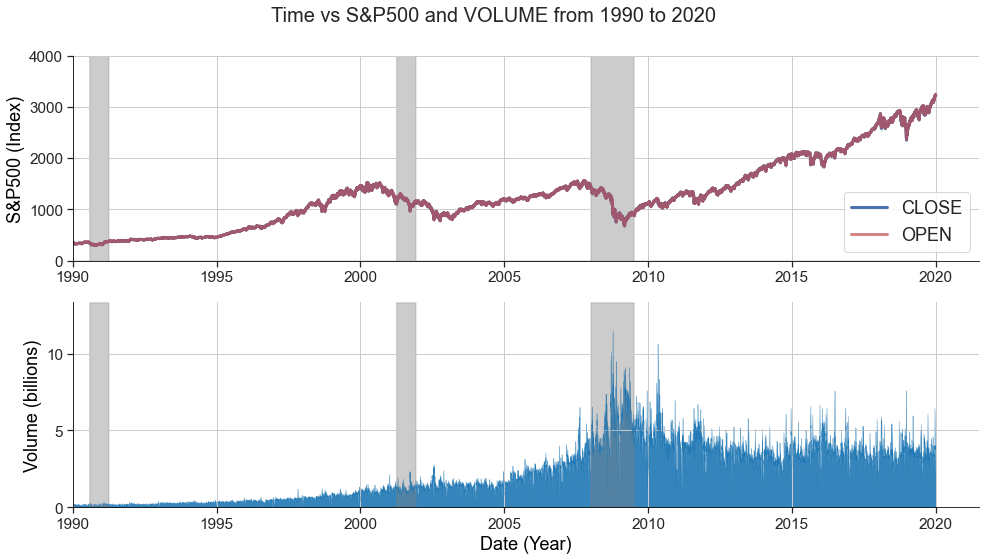

In [68]:
ohlc("s&p500", "volume")

Analysis:
- Grey bands indicate periods of recession.
- There is no clear distinction between "open" and "close" values.
- There is a clear decline in the values during the recession, especially during 2001-2002, and 2007-2009.
- The volume of traded stocks (bottom figure) also shows that the highest number of stocks were traded during the recession (~11 billion) and since the Great Recession of 2007, the number of stocks traded remained higher (around 4 billion) than pre-recession.

In [69]:
for col in ["high", "low", "open", "close", "volume"]:
    print(f"EDA for S&P 500 index values are distributed as follows: \n")
    print(f"{col.upper()}:\n{df[col].describe()} \n")
    print("================================================================")

EDA for S&P 500 index values are distributed as follows: 

HIGH:
count    9757.000000
mean     1220.670617
std       647.440654
min       301.450012
25%       747.539978
50%      1173.560059
75%      1440.859985
max      3247.929932
Name: high, dtype: float64 

EDA for S&P 500 index values are distributed as follows: 

LOW:
count    9757.000000
mean     1206.131688
std       642.329132
min       294.510010
25%       734.520020
50%      1156.069946
75%      1422.079956
max      3234.370117
Name: low, dtype: float64 

EDA for S&P 500 index values are distributed as follows: 

OPEN:
count    9757.000000
mean     1213.677551
std       644.996616
min       295.450012
25%       742.159973
50%      1165.030029
75%      1432.630005
max      3247.229980
Name: open, dtype: float64 

EDA for S&P 500 index values are distributed as follows: 

CLOSE:
count    9757.000000
mean     1213.906908
std       645.033985
min       295.459991
25%       740.729980
50%      1165.359985
75%      1432.560059
max

In [70]:
round(df.describe(), 0).transpose()

count          mean           std         min          25%  \
gold           9757.0  6.950000e+02  4.560000e+02       253.0        346.0   
silver         9757.0  1.100000e+01  8.000000e+00         4.0          5.0   
gdp            9757.0  1.229700e+04  4.434000e+03      5873.0       8260.0   
unemploy       9757.0  8.433000e+03  2.400000e+03      5481.0       6850.0   
med_income     9757.0  6.035300e+04  3.086000e+03     55263.0      57732.0   
cpi            9757.0  1.900000e+02  3.700000e+01       127.0        159.0   
con_sentiment  9757.0  8.800000e+01  1.200000e+01        55.0         79.0   
oil            9757.0  4.700000e+01  3.300000e+01         9.0         19.0   
SMA            9757.0  1.206000e+03  6.380000e+02       310.0        724.0   
EWMA_200       9757.0  1.182000e+03  6.190000e+02       327.0        677.0   
upper_band     9757.0  1.262000e+03  6.620000e+02       323.0        765.0   
lower_band     9757.0  1.149000e+03  6.160000e+02       294.0        675.0   
band_gap       9757.0  1.130000e+02  8.000000e+01         9.0         56.0   
RSI            9757.0  5.400000e+01  1.100000e+01        14.0         46.0   
label          9757.0  0.000000e+00  1.000000e+00        -1.0         -1.0   
dji            9757.0  1.062000e+04  5.853000e+03      2365.0       6472.0   
nikkei         9757.0  1.617500e+04  5.180000e+03      7055.0      11478.0   
ftse           9757.0  5.062000e+03  1.518000e+03      1990.0       3843.0   
hsi            9757.0  1.533900e+04  7.185000e+03      2737.0       9814.0   
tnx            9757.0  5.000000e+00  2.000000e+00         1.0          3.0   
vix            9757.0  1.900000e+01  8.000000e+00         9.0         14.0   
volume         9757.0  2.043601e+09  1.744714e+09  14990000.0  458720000.0   
open           9757.0  1.214000e+03  6.450000e+02       295.0        742.0   
high           9757.0  1.221000e+03  6.470000e+02       301.0        748.0   
low            9757.0  1.206000e+03  6.420000e+02       295.0        735.0   
close          9757.0  1.214000e+03  6.450000e+02       295.0        741.0   

                        50%           75%           max  
gold           3.990000e+02  1.186000e+03  1.895000e+03  
silver         6.000000e+00  1.600000e+01  4.900000e+01  
gdp            1.177200e+04  1.555800e+04  2.169400e+04  
unemploy       7.764000e+03  9.011000e+03  1.535200e+04  
med_income     6.062400e+04  6.203300e+04  6.956000e+04  
cpi            1.850000e+02  2.250000e+02  2.570000e+02  
con_sentiment  9.000000e+01  9.600000e+01  1.120000e+02  
oil            3.200000e+01  6.800000e+01  1.440000e+02  
SMA            1.160000e+03  1.428000e+03  3.120000e+03  
EWMA_200       1.156000e+03  1.405000e+03  2.980000e+03  
upper_band     1.225000e+03  1.490000e+03  3.254000e+03  
lower_band     1.092000e+03  1.366000e+03  2.987000e+03  
band_gap       1.000000e+02  1.510000e+02  5.870000e+02  
RSI            5.500000e+01  6.200000e+01  8.700000e+01  
label          1.000000e+00  1.000000e+00  1.000000e+00  
dji            1.037800e+04  1.274600e+04  2.864500e+04  
nikkei         1.638700e+04  1.974700e+04  3.871300e+04  
ftse           5.338000e+03  6.264000e+03  7.878000e+03  
hsi            1.402500e+04  2.164200e+04  3.315400e+04  
tnx            5.000000e+00  6.000000e+00  9.000000e+00  
vix            1.700000e+01  2.300000e+01  8.100000e+01  
volume         1.449900e+09  3.416190e+09  1.145623e+10  
open           1.165000e+03  1.433000e+03  3.247000e+03  
high           1.174000e+03  1.441000e+03  3.248000e+03  
low            1.156000e+03  1.422000e+03  3.234000e+03  
close          1.165000e+03  1.433000e+03  3.240000e+03

Analysis:
- The values in each column all have different scales and ranges, so these values will need to be normalised (standardised) when doing the comparison.
- There doesn't seem to be any values that are out of the ordinary.

<Figure size 432x288 with 0 Axes>

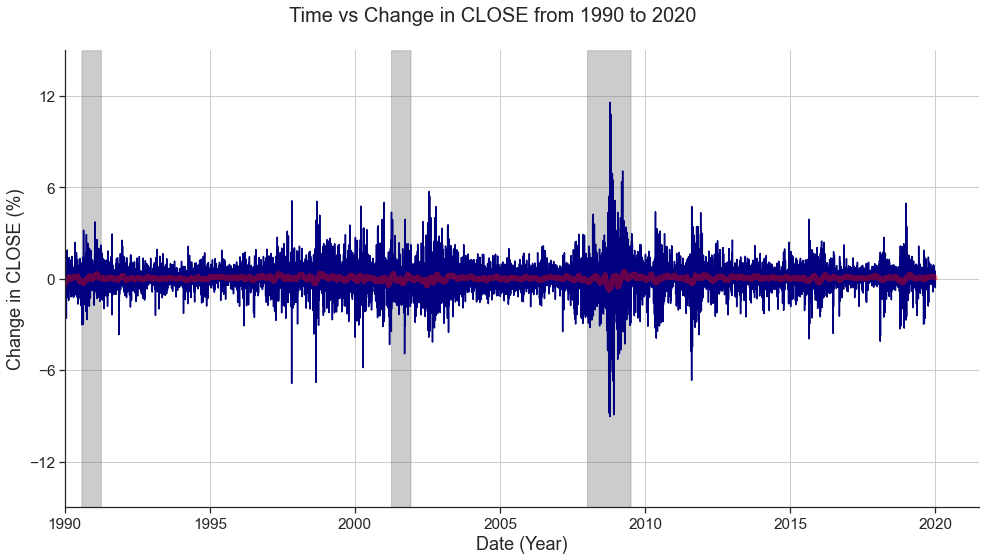

In [71]:
diffplot("close")

Analysis:
- This plot shows how the closing value changed from its previous day value.
- The biggest fluctuation was during the Great Recession (+/- 12%), and also during the lesser recession of 2002.

#### 2.2.2 Analysis of Other Indices

<Figure size 432x288 with 0 Axes>

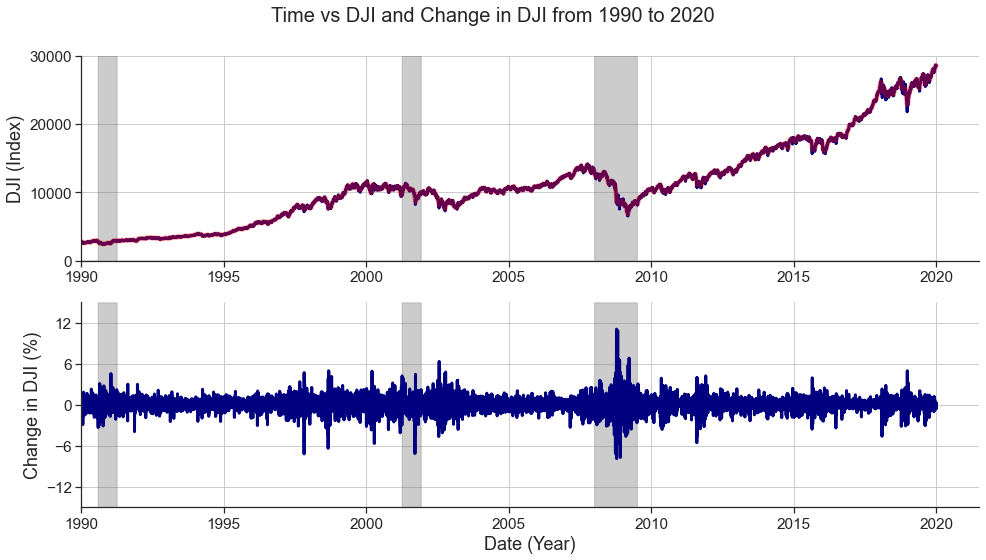

EDA for dji: 
 
count     9757.000000
mean     10619.851435
std       5852.932783
min       2365.100000
25%       6471.759766
50%      10377.519531
75%      12745.879883
max      28645.259766
Name: dji, dtype: float64 



In [72]:
linegraph("dji")

Analysis:
- Similar trend and behaviour found for Dow Jones.
- This is probably not surprising, since the Dow Jones consists of 30 largest companies that are also represented in the S&P 500.

<Figure size 432x288 with 0 Axes>

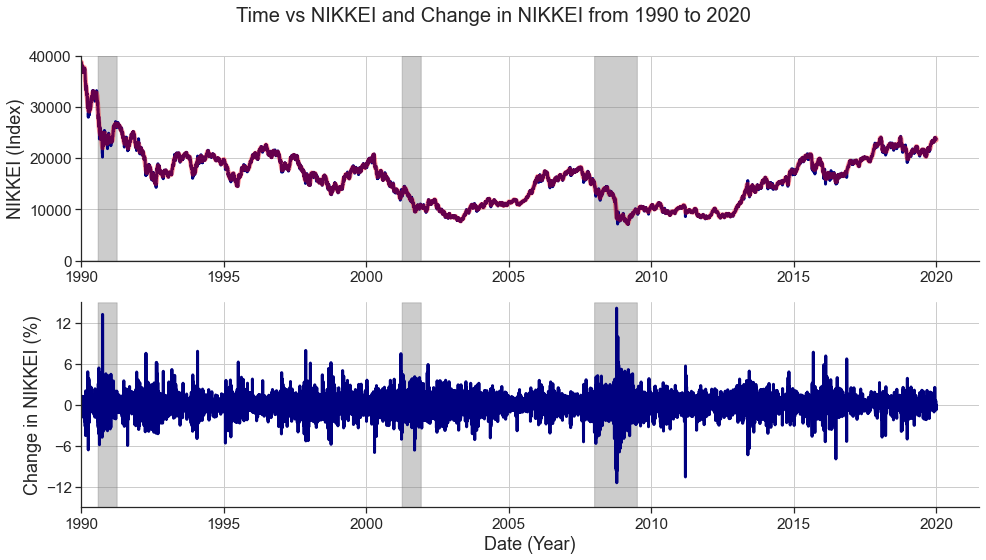

EDA for nikkei: 
 
count     9757.000000
mean     16175.274484
std       5180.322674
min       7054.979980
25%      11477.559570
50%      16387.250000
75%      19747.470703
max      38712.878906
Name: nikkei, dtype: float64 



In [73]:
linegraph("nikkei")

Analysis:
- The 80s and early 90s were when the economic bubble was at its peak for the Japanese market, but experienced rapid decline once the bubble bursted.
- The Japanese market continued to decline since the 1990s, and began to recover since the Great Recession.
- However, it failed to recover to its peak experienced in 1990.

<Figure size 432x288 with 0 Axes>

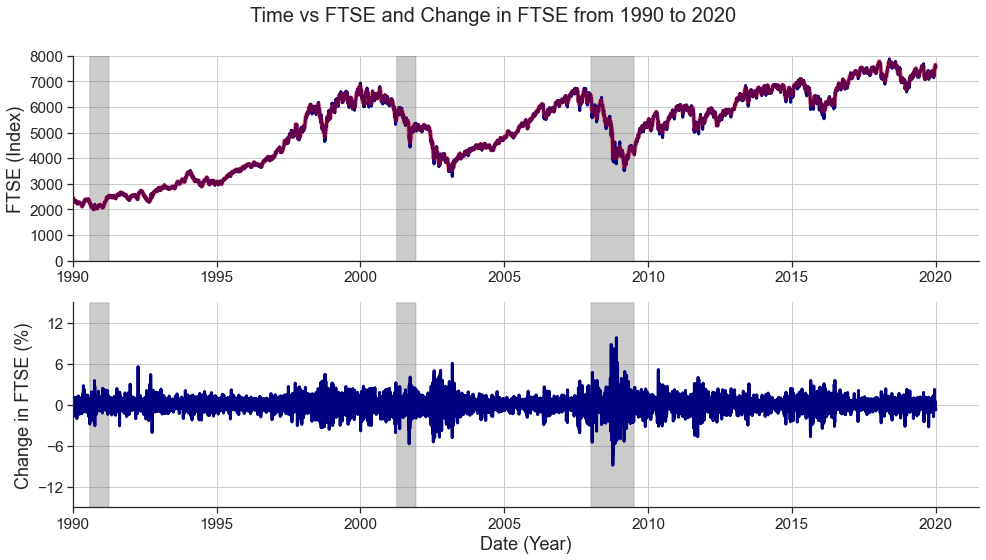

EDA for ftse: 
 
count    9757.000000
mean     5061.707317
std      1518.295296
min      1990.199951
25%      3842.899902
50%      5338.000000
75%      6263.500000
max      7877.500000
Name: ftse, dtype: float64 



In [74]:
linegraph("ftse")

Analysis:
- The London Exchange also follows a similar trend as the American indices.
- The recession periods in the 2000s seem to have influenced globally, as evidenced by the steep decline during these periods for all major markets around the world.

<Figure size 432x288 with 0 Axes>

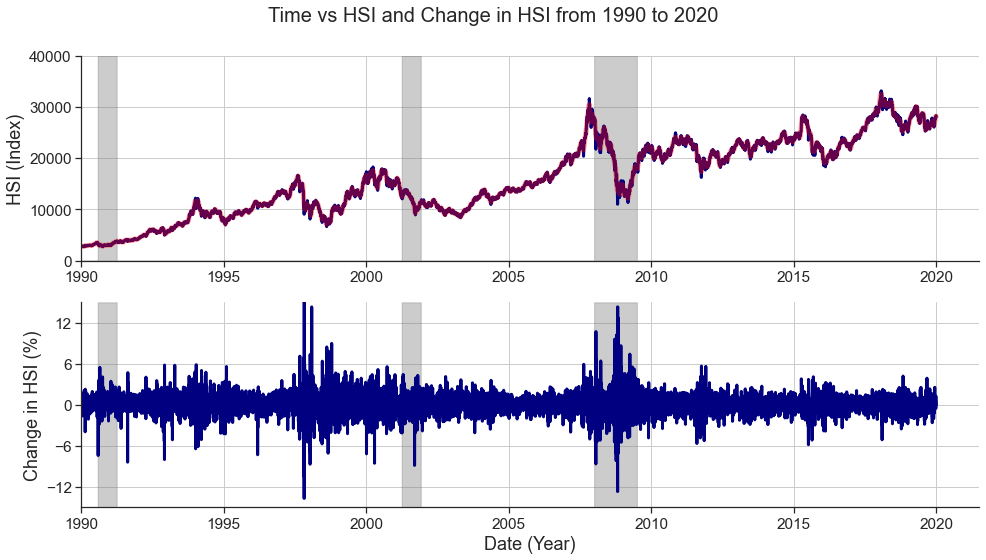

EDA for hsi: 
 
count     9757.000000
mean     15339.273212
std       7184.708059
min       2736.600098
25%       9813.780273
50%      14024.629883
75%      21641.820312
max      33154.121094
Name: hsi, dtype: float64 



In [75]:
linegraph("hsi")

Analysis:
- Interestingly, the steep decline that we see during the recession of 2002 in other global markets are not clearly evident in American indices, which indicates that the American economy did not suffer as much as other economies around the world.

<Figure size 432x288 with 0 Axes>

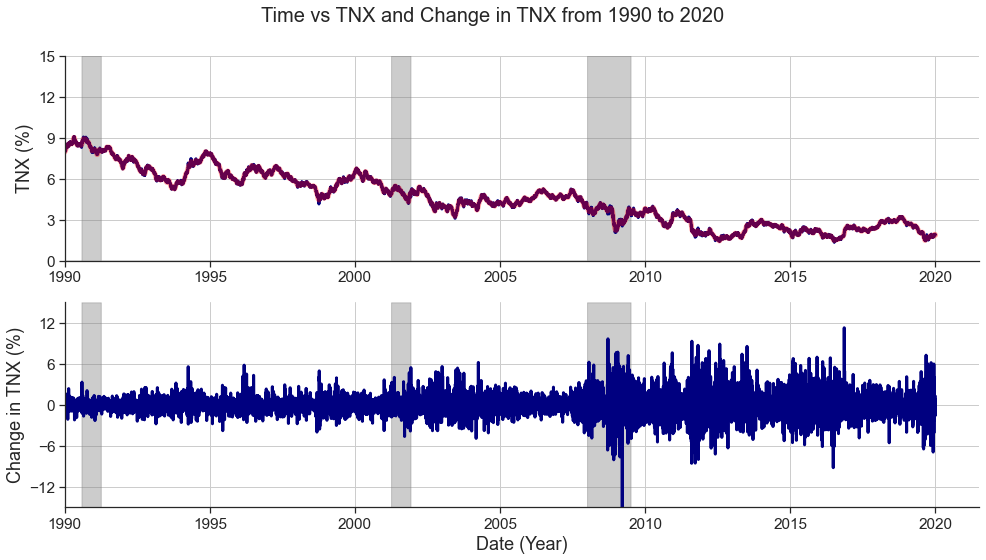

EDA for tnx: 
 
count    9757.000000
mean        4.658205
std         1.901273
min         1.366000
25%         2.932000
50%         4.597000
75%         6.076000
max         9.090000
Name: tnx, dtype: float64 



In [76]:
linegraph("tnx", "%")

Analysis:
- Unlike the stock market which increased in value over time, the Treasury Yield declined in its value over time, indicating a negative correlation between the two.
- A rising yield indicates falling demand for Treasury bonds, which means the confidence in the stock market is high (investors prefer higher-risk, higher-reward investments). A falling yield suggests the opposite.
- Therefore, the falling Treasury yield over time indicates the confidence in the stock market declined over time.


<Figure size 432x288 with 0 Axes>

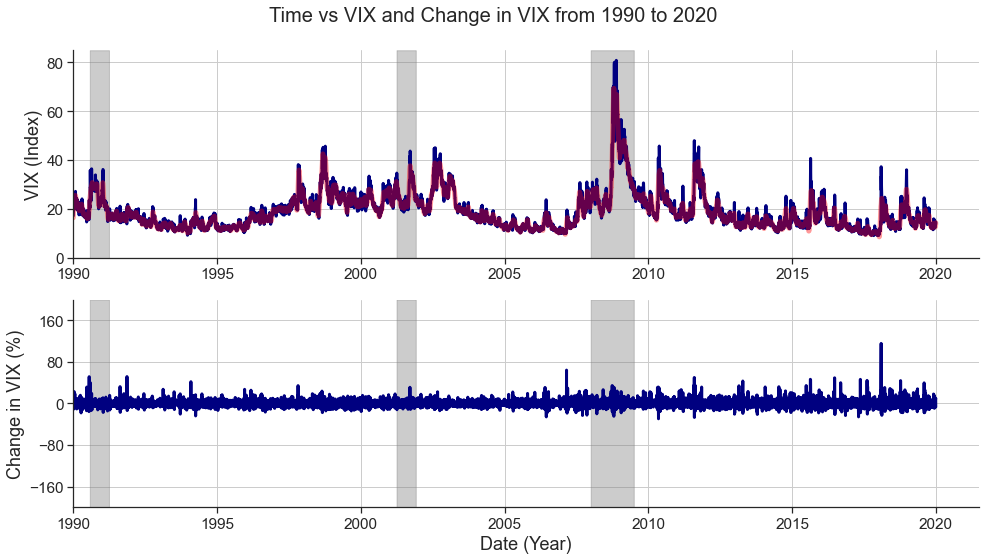

EDA for vix: 
 
count    9757.000000
mean       19.219158
std         7.718772
min         9.140000
25%        13.580000
50%        17.370001
75%        22.620001
max        80.860001
Name: vix, dtype: float64 



In [77]:
linegraph("vix")

Analysis:
- VIX indicates how volatile the stock prices are.
- VIX value was at its peak during the Great Recession, and also less peaks are typically found during other lesser recession periods.
- This indicates the stock market becomes volatile during recessions when the investors' confidence is probably at its lowest.

#### 2.2.3 Analysis of Commodity Prices & Economic Indicators

<Figure size 432x288 with 0 Axes>

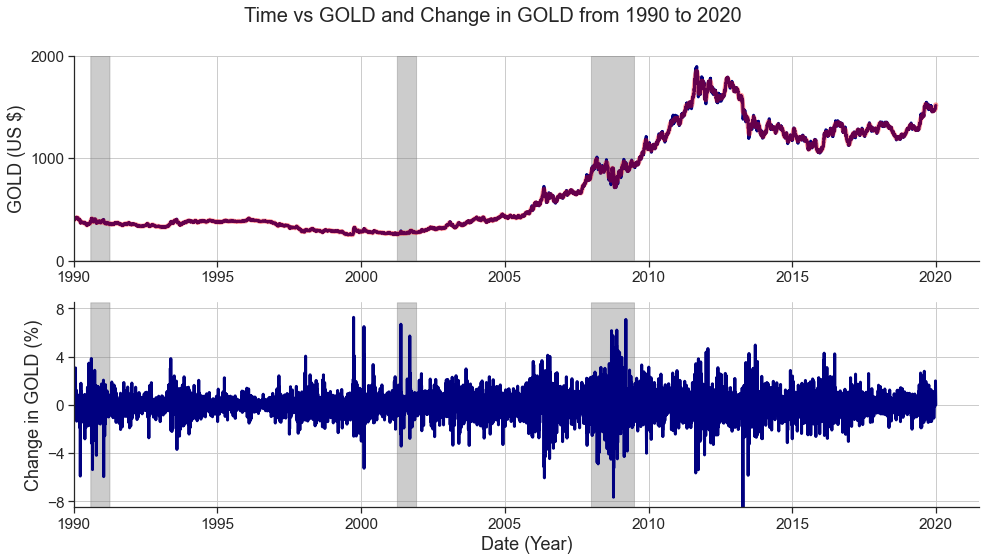

EDA for gold: 
 
count    9757.000000
mean      695.305104
std       456.095421
min       252.800000
25%       345.700000
50%       399.000000
75%      1185.550000
max      1895.000000
Name: gold, dtype: float64 



In [78]:
linegraph("gold", "US $")

Analysis:
- Similar daily fluctuation pattern observed as other market indices, especially during the Great Recession.
- The price of gold increased rapidly post-Great Recession, but then began to decline and stablise a few years later.
- This suggests the investors looked towards more safer investment post-recession but as the investors confidence increased, the price of gold began to decline.

<Figure size 432x288 with 0 Axes>

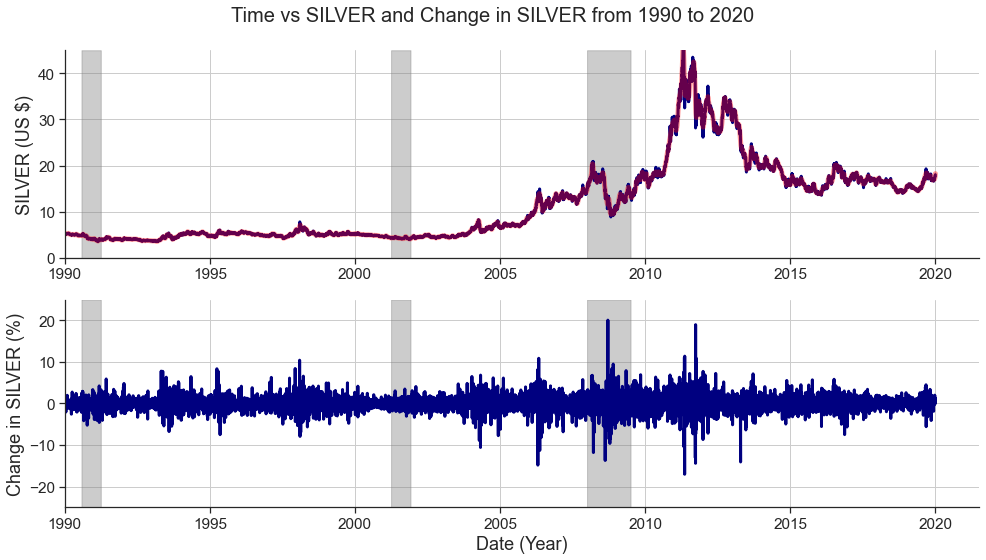

EDA for silver: 
 
count    9757.000000
mean       10.906612
std         8.246081
min         3.547500
25%         4.852500
50%         6.025000
75%        16.200000
max        48.700000
Name: silver, dtype: float64 



In [79]:
linegraph("silver", "US $")

<Figure size 432x288 with 0 Axes>

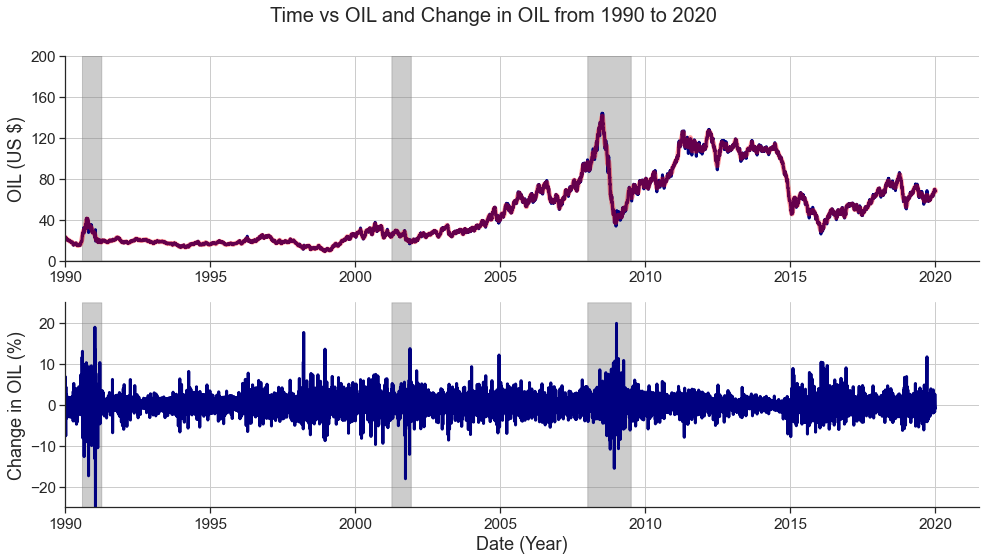

EDA for oil: 
 
count    9757.000000
mean       46.955354
std        32.507299
min         9.100000
25%        19.250000
50%        32.350000
75%        67.520000
max       143.950000
Name: oil, dtype: float64 



In [80]:
linegraph("oil", "US $")

Analysis:
- A similar pattern as gold is observed for silver and oil.
- It may be better to pick one feature from the commodities as choosing all of them is unlikely to add significant value to model training.

<Figure size 432x288 with 0 Axes>

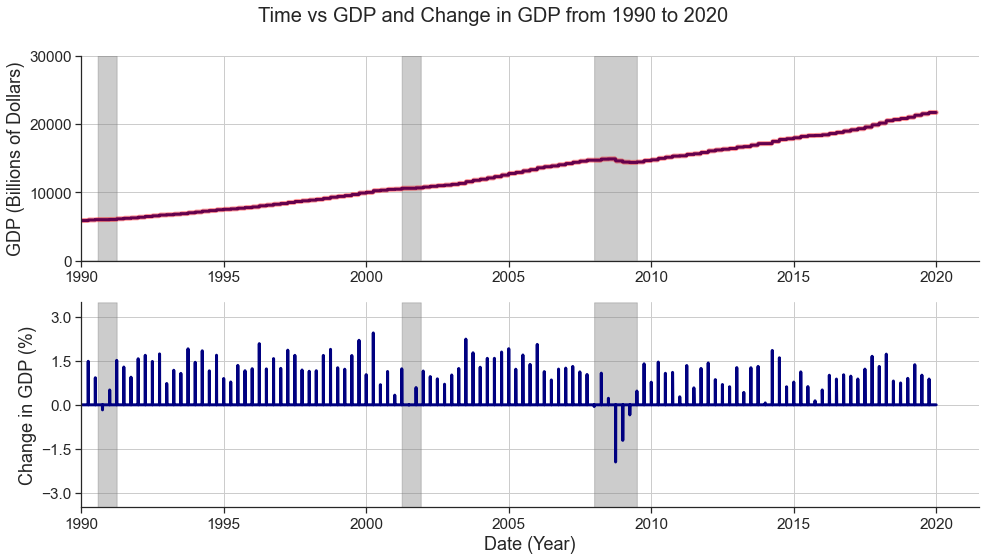

EDA for gdp: 
 
count     9757.000000
mean     12297.221520
std       4434.014917
min       5872.701000
25%       8259.771000
50%      11772.234000
75%      15557.535000
max      21694.458000
Name: gdp, dtype: float64 



In [81]:
linegraph("gdp", "Billions of Dollars")

Analysis:
- GDP in the US generally continued to increase by around 1.3 - 1.5%.
- The only time that the GDP declined was during the Great Recession, where the GDP fell by more than -1.5%, indicating the massive impact of the Great Recession on the US economy.

<Figure size 432x288 with 0 Axes>

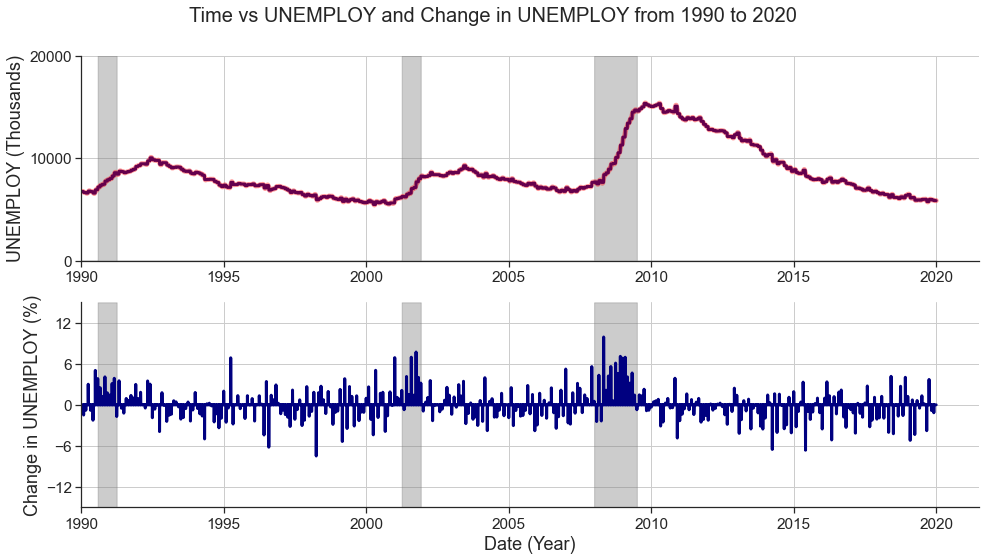

EDA for unemploy: 
 
count     9757.000000
mean      8433.203136
std       2399.969593
min       5481.000000
25%       6850.000000
50%       7764.000000
75%       9011.000000
max      15352.000000
Name: unemploy, dtype: float64 



In [82]:
linegraph("unemploy", "Thousands")

Analysis:
- There seems to be a clear pattern between the number of unemployed and the economic recession.
- During the recession, the number of unemployed increases by more than 6% and then gradually falls until another recession hits the economy.

<Figure size 432x288 with 0 Axes>

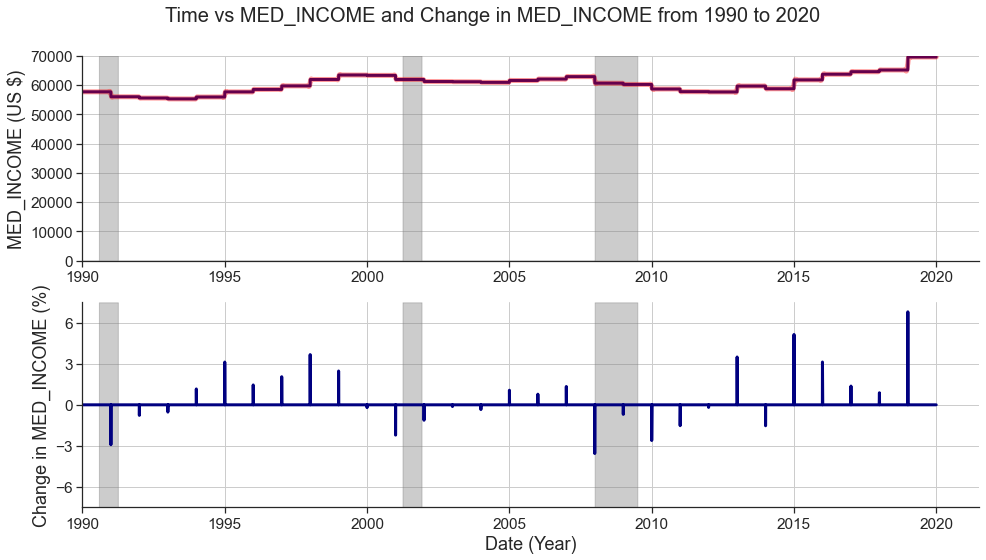

EDA for med_income: 
 
count     9757.000000
mean     60353.177719
std       3086.235842
min      55263.000000
25%      57732.000000
50%      60624.000000
75%      62033.000000
max      69560.000000
Name: med_income, dtype: float64 



In [83]:
linegraph("med_income", "US $")

Analysis:
- Similar to the unemployment, the median income in the US fell only during the recession periods.
- Otherwise, the median income remained relatively stable at around USD 60,000 - 70,000.

<Figure size 432x288 with 0 Axes>

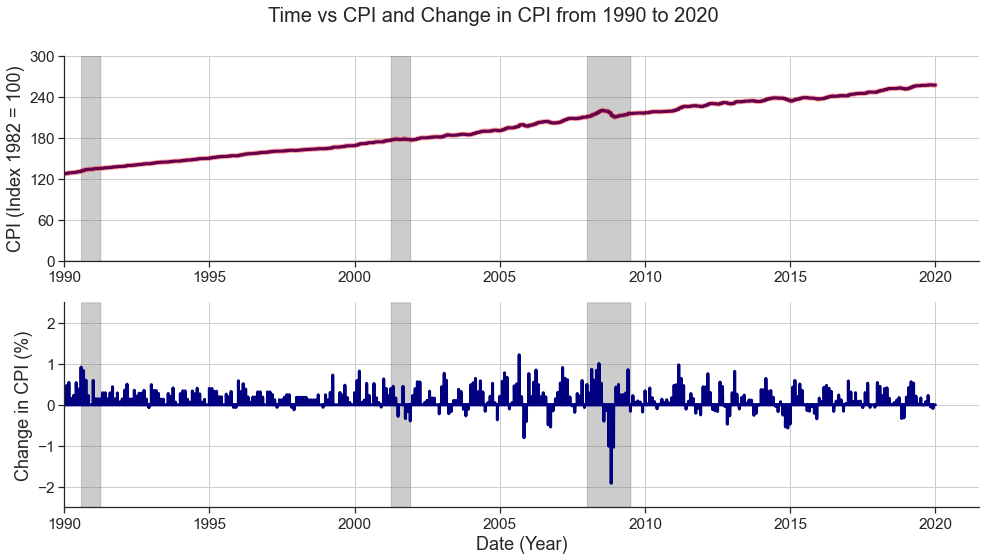

EDA for cpi: 
 
count    9757.000000
mean      190.137128
std        37.005976
min       127.400000
25%       158.600000
50%       185.000000
75%       224.906000
max       257.346000
Name: cpi, dtype: float64 



In [84]:
linegraph("cpi", "Index 1982 = 100")

Analysis:
- Similar pattern found as the GDP.

#### 2.2.4 Analysis of Technical Indicators

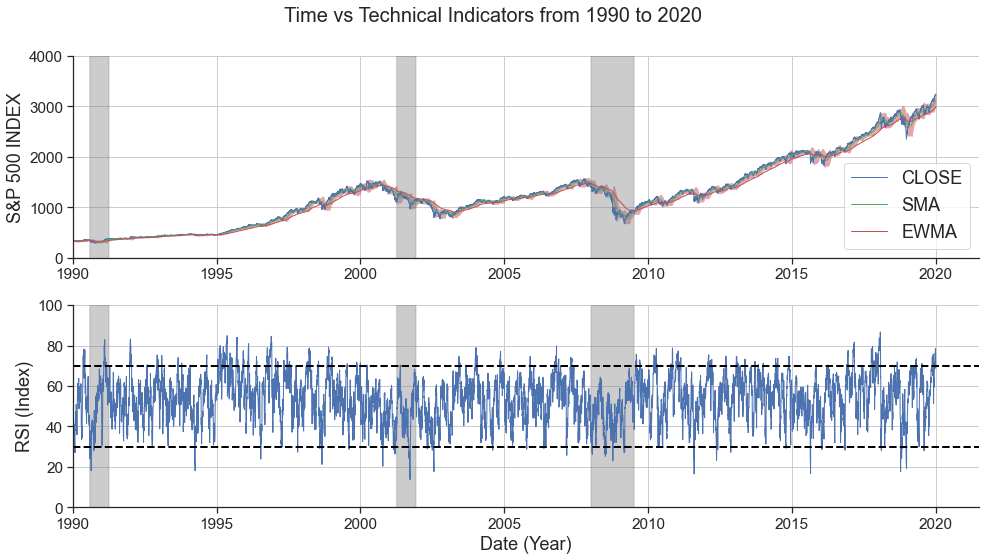

In [85]:
col_list = ["close", "SMA", "EWMA_200", "upper_band", "lower_band"]
## Plot Settings
fig, axes = plt.subplots(2,1, figsize = (14,8))
plt.rcParams['font.size'] = 20
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
sns.set_theme(style='ticks', font_scale=1.4)

fig.suptitle(f"Time vs Technical Indicators from 1990 to 2020",
             fontsize = 20)
x = df.index
rx = recession_df.index
y = df[col_list]

ymax = y.max().max()
n = int(math.log10(ymax))
num = 10**n
ymax = int(ymax/num)*num + num  

### Plotting SMA, EWMA and Bollinger Bands
close = y.close
sma = y.SMA
ewma = y.EWMA_200
upper = y.upper_band
lower = y.lower_band
rsi = df.RSI

lw = 1
axes[0].plot(x, close, 'b', label='CLOSE', lw=lw)
axes[0].plot(x, sma, 'g', label='SMA', lw=lw)
axes[0].plot(x, ewma, 'r', label='EWMA', lw=lw)

axes[0].fill_between(x, lower, upper, color='r', lw = 0.2, alpha=0.5)
axes[0].legend(fontsize=18)

## Plotting RSI
axes[1].plot(x, rsi, 'b', label='RSI', lw=lw)
axes[1].axhline(y=30, color = 'black', lw = 2, ls = "--")
axes[1].axhline(y=70, color = 'black', lw = 2, ls = "--")
    
for i in range(2):
    ry = recession_df.recession * ymax if i == 0 else recession_df.recession * 100
    
    axes[i].fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
    axes[i].plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")

    axes[i].set_xlim(df.index[0])
    axes[i].set_ylim((0,ymax) if i == 0 else (0, 100)) 

    axes[i].xaxis.set_major_locator(mdates.YearLocator(base=5))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

    axes[i].grid(True, which='both')
    sns.despine(ax=axes[i], offset=0)

    txt = f"S&P 500 INDEX" if i == 0 else "RSI (Index)"
    axes[i].set_ylabel(txt, fontsize = 18)

axes[1].set_xlabel(f"Date (Year)", fontsize = 18)

plt.show()

Analysis:
- Both SMA and EWMA closely resemble the pattern of S&P 500 index, as they should.
- Usually, if the RSI line goes below 30, it indicates an oversold market whereas the RSI going above 70 indicates overbought conditions. 
- According to the bottom figure, the stocks were overbrought (i.e. bought at higher price than its actual value) during 1995- 1996, and during 2017-2018.
- The stocks were typically oversold (i.e. sold at a lower price than its actual value) during recession periods.

#### 2.2.5. Analysis of Consumer and News Sentiments

<Figure size 432x288 with 0 Axes>

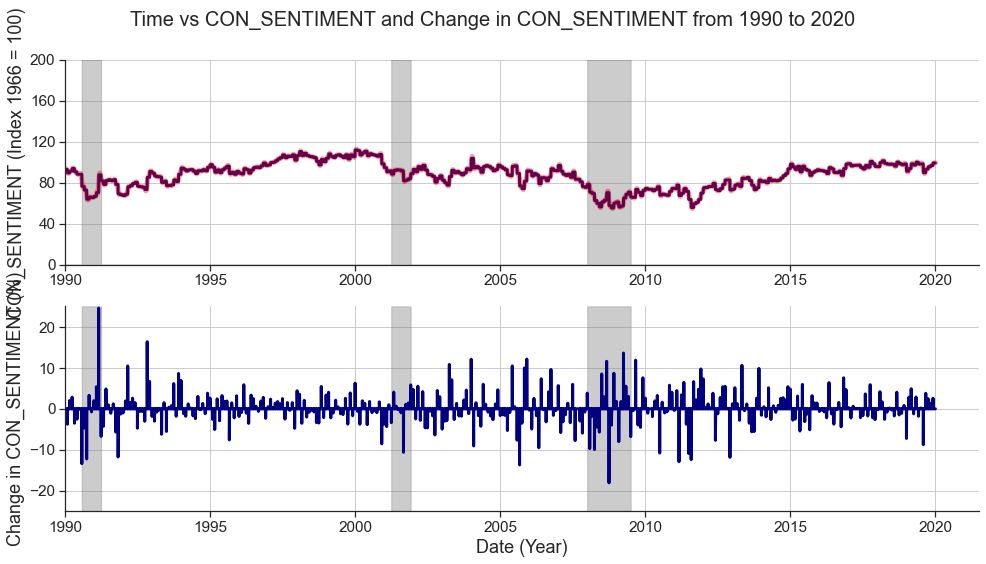

EDA for con_sentiment: 
 
count    9757.000000
mean       87.803464
std        12.296430
min        55.300000
25%        79.300000
50%        90.000000
75%        95.900000
max       112.000000
Name: con_sentiment, dtype: float64 



In [86]:
linegraph("con_sentiment", "Index 1966 = 100")

Analysis:
- Consumer sentiment fell during the recession periods, most sharply during the Great Recession.
- During normal times, the consumer sentiment doesn't seem to fluctuate much, and remains relatively stable.

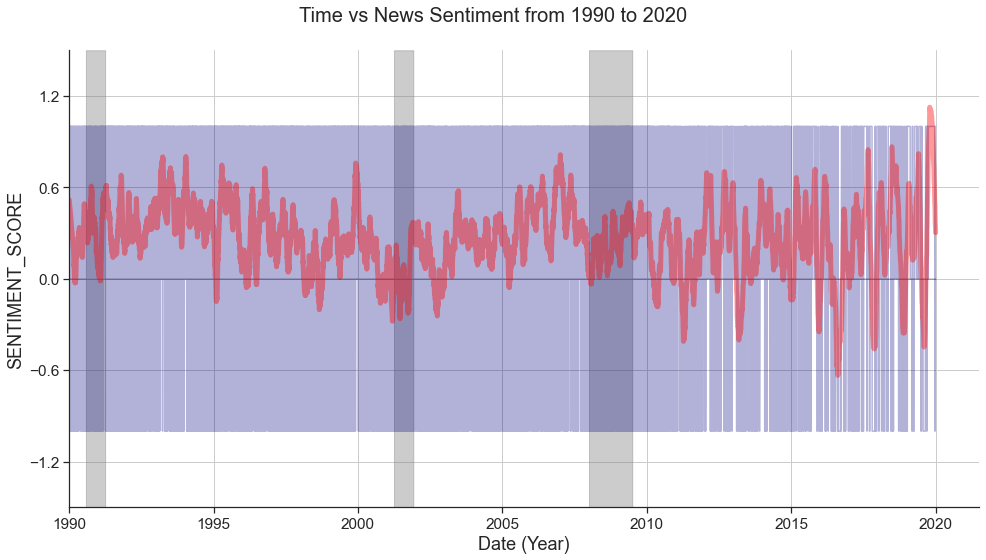

In [87]:
### Plot Time vs News Sentiment
fig, axes = plt.subplots(1, 1, figsize = (14,8))
plt.rcParams['font.size'] = 20
plt.rcParams["figure.autolayout"] = True
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
sns.set_theme(style='ticks', font_scale=1.4)

fig.suptitle(f"Time vs News Sentiment from 1990 to 2020",
              fontsize = 20)

x = df.index
rx = recession_df.index

y = df.label
ymax = math.ceil(y.max())

n = int(math.log10(ymax))
num = 10**n
ymax = int(ymax/num)*num + num/2      
axes.plot(x, y, color = "navy", alpha = 0.3)
    
yhat = savgol_filter(y, 101, 3)
sns.lineplot(ax=axes,
             x=df.index,
             y=yhat,
             color = 'red',
             alpha = 0.4,
             linewidth = 5)

ry = recession_df.recession * ymax
axes.fill_between(rx, ry, step="pre", alpha=0.4, color = "grey")
axes.plot(rx, ry, color = "grey", linewidth = 0, markeredgecolor = "none")

axes.set_ylim((-ymax, ymax))
axes.set_xlim(df.index[0])
axes.xaxis.set_major_locator(mdates.YearLocator(base=5))
axes.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

m = 5
axes.yaxis.set_major_locator(plt.MaxNLocator(m))

axes.grid(True, which='both')
sns.despine(ax=axes, offset=0)

txt = f"SENTIMENT_SCORE" 
axes.set_ylabel(txt, fontsize = 18)

ry2 = recession_df.recession * -ymax
axes.fill_between(rx, ry2, step="pre", alpha=0.4, color = "grey")
axes.plot(rx, ry2, color = "grey", linewidth = 0, markeredgecolor  = "none")
 
axes.set_xlabel(f"Date (Year)", fontsize = 18)

plt.show()

Analysis:
- Sentiment analysis based on New York Times doesn't seem to clearly follow the pattern observed in other features, i.e. no clear relationship with recession periods.
- This is probably likely due to either the fact that the method used in sentiment analsys was imperfect or the news articles from New York Times did not strongly correlate (because news articles generally tend to be neutral)

In [88]:
df.label = yhat
df.rename(columns = {"label":"s_score"}, inplace = True)

### 2.3 Comparison of (Input) Features Against S&P 500 Closing Value (Target Feature)

Because all features are in different scales, we will standardise (normalise) all feature values including S&P 500 closing value for better comparison (we won't include technical indicators here because they are derived from S&P 500, and also sentiment score, because its base value is already zero).

In [89]:
scaler = StandardScaler()
columns = list(df.columns)
# columns.remove("s_score")

df_scaled = df[columns].copy()

scaled = scaler.fit_transform(df_scaled)

In [90]:
df_scaled = pd.DataFrame(scaled, columns=columns, index=df.index)
df_scaled

gold    silver       gdp  unemploy  med_income       cpi  \
1990-01-01 -0.650566 -0.690862 -1.448991 -0.700546   -0.867178 -1.695411   
1990-01-02 -0.649689 -0.690862 -1.448991 -0.700546   -0.867178 -1.695411   
1990-01-03 -0.658460 -0.696926 -1.448991 -0.700546   -0.867178 -1.695411   
1990-01-04 -0.655171 -0.692560 -1.448991 -0.700546   -0.867178 -1.695411   
1990-01-05 -0.636533 -0.682373 -1.448991 -0.700546   -0.867178 -1.695411   
...              ...       ...       ...       ...         ...       ...   
2019-12-25  1.725155  0.809928  2.119460 -1.071820    2.983341  1.806203   
2019-12-26  1.725155  0.809928  2.119460 -1.071820    2.983341  1.806203   
2019-12-27  1.789618  0.839034  2.119460 -1.071820    2.983341  1.806203   
2019-12-30  1.796744  0.839034  2.119460 -1.071820    2.983341  1.806203   
2019-12-31  1.796744  0.865715  2.119460 -1.071820    2.983341  1.806203   

            con_sentiment       oil       SMA  EWMA_200  ...    nikkei  \
1990-01-01       0.422627 -0.792335 -1.350165 -1.372890  ...  4.350841   
1990-01-02       0.422627 -0.792335 -1.350165 -1.372890  ...  4.350841   
1990-01-03       0.422627 -0.747727 -1.349801 -1.372449  ...  4.350841   
1990-01-04       0.422627 -0.752342 -1.349461 -1.372063  ...  4.350841   
1990-01-05       0.422627 -0.732961 -1.349195 -1.371736  ...  4.266263   
...                   ...       ...       ...       ...  ...       ...   
2019-12-25       0.934997  0.686178  2.969620  2.886891  ...  1.468631   
2019-12-26       0.934997  0.686178  2.977274  2.891227  ...  1.496054   
2019-12-27       0.934997  0.675410  2.985119  2.895522  ...  1.479220   
2019-12-30       0.934997  0.656645  2.992118  2.899473  ...  1.444259   
2019-12-31       0.934997  0.640340  2.999782  2.903538  ...  1.444259   

                ftse       hsi       tnx       vix    volume      open  \
1990-01-01 -1.730719 -1.740059  1.726192 -0.256422 -1.078473 -1.333839   
1990-01-02 -1.730719 -1.740059  1.726192 -0.256422 -1.078473 -1.333839   
1990-01-03 -1.711222 -1.737191  1.752492 -0.133339 -1.061128 -1.324087   
1990-01-04 -1.719192 -1.735897  1.747232  0.000109 -1.069915 -1.325528   
1990-01-05 -1.723869 -1.739808  1.752492  0.115418 -1.080502 -1.330319   
...              ...       ...       ...       ...       ...       ...   
2019-12-25  1.693099  1.743367 -1.445530 -0.848515 -0.428207  3.119203   
2019-12-26  1.693099  1.743367 -1.448159 -0.851106  0.067109  3.121917   
2019-12-27  1.701464  1.793644 -1.464465 -0.750049  0.220718  3.152973   
2019-12-30  1.663393  1.806724 -1.453419 -0.569959  0.555815  3.141902   
2019-12-31  1.633951  1.788679 -1.440796 -0.704702  0.487331  3.103280   

                high       low     close  
1990-01-01 -1.329890 -1.329841 -1.324365  
1990-01-02 -1.329890 -1.329841 -1.324365  
1990-01-03 -1.328500 -1.320639 -1.325807  
1990-01-04 -1.331326 -1.328424 -1.330598  
1990-01-05 -1.336099 -1.330822 -1.335978  
...              ...       ...       ...  
2019-12-25  3.098140  3.136214  3.115457  
2019-12-26  3.119225  3.146630  3.141085  
2019-12-27  3.131350  3.157793  3.141256  
2019-12-30  3.120522  3.130080  3.112217  
2019-12-31  3.106312  3.123011  3.126931  

[9757 rows x 26 columns]

In [91]:
# df_scaled["s_score"] = df.s_score
# df_scaled

#### 2.3.1 Comparison Against US & European Indices

<Figure size 432x288 with 0 Axes>

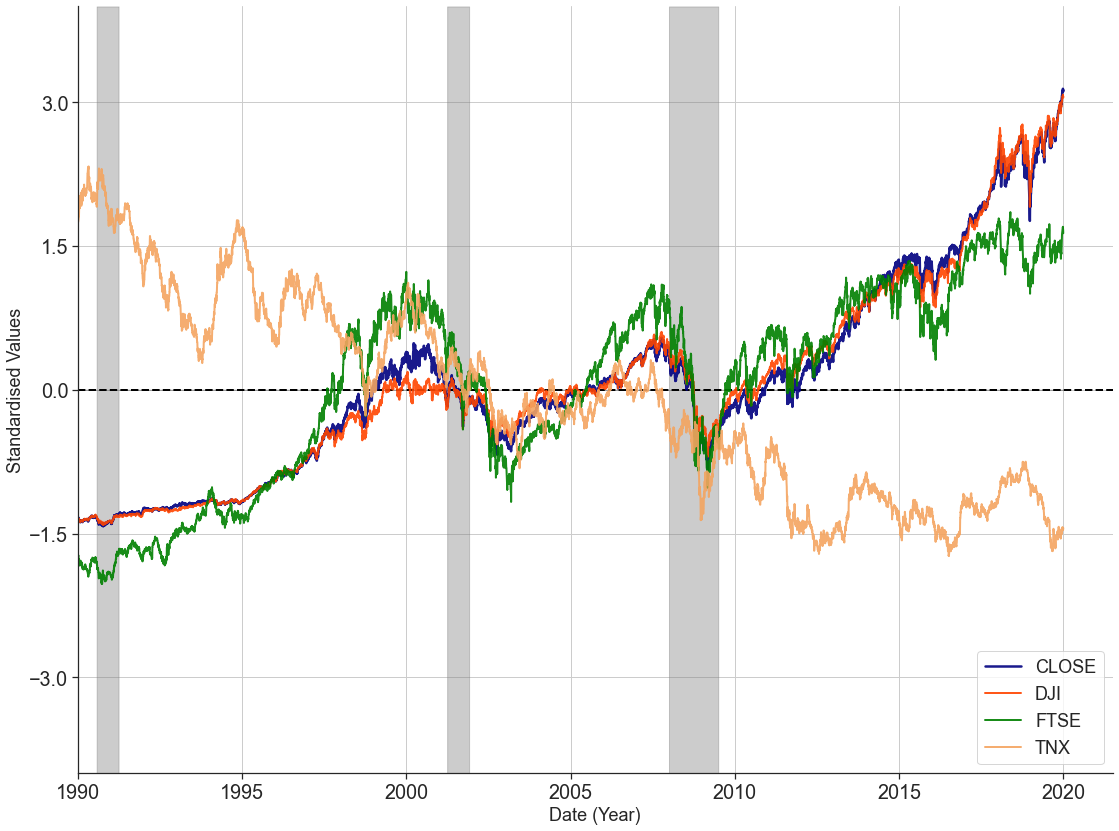

In [92]:
## S&P 500 vs Other Indices - US & Europe
index_list = ["close", "dji", "ftse", "tnx"]
compare_graph(index_list)

Analysis:
- DJI and FTSE generally follow the similar upward trend as S&P 500, while TNX clealy exhibits opposite trend.

#### 2.3.2 Comparison Against Asian Indices

<Figure size 432x288 with 0 Axes>

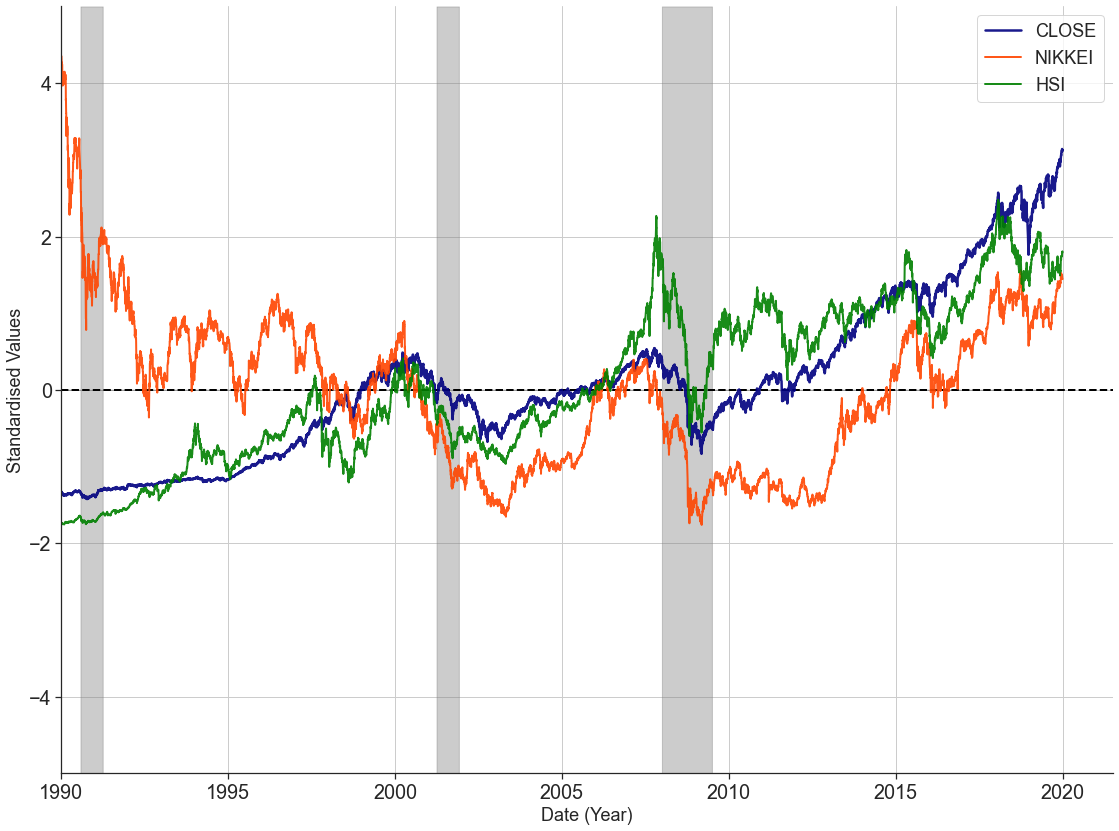

In [93]:
## S&P 500 vs Other Indices - Asian Market
index_list = ["close", "nikkei", "hsi"]
compare_graph(index_list)

Analysis:
- Hang Seng index also follows a similar trend as S&P 500.
- Nikkei generally follows a similar trend as S&P 500 from 2000 onwards. Its behaviour during the 90s is likely due to the economic bubble burst that was locally experienced only in Japan.

#### 2.3.3 Comparison Against Commodity Prices

<Figure size 432x288 with 0 Axes>

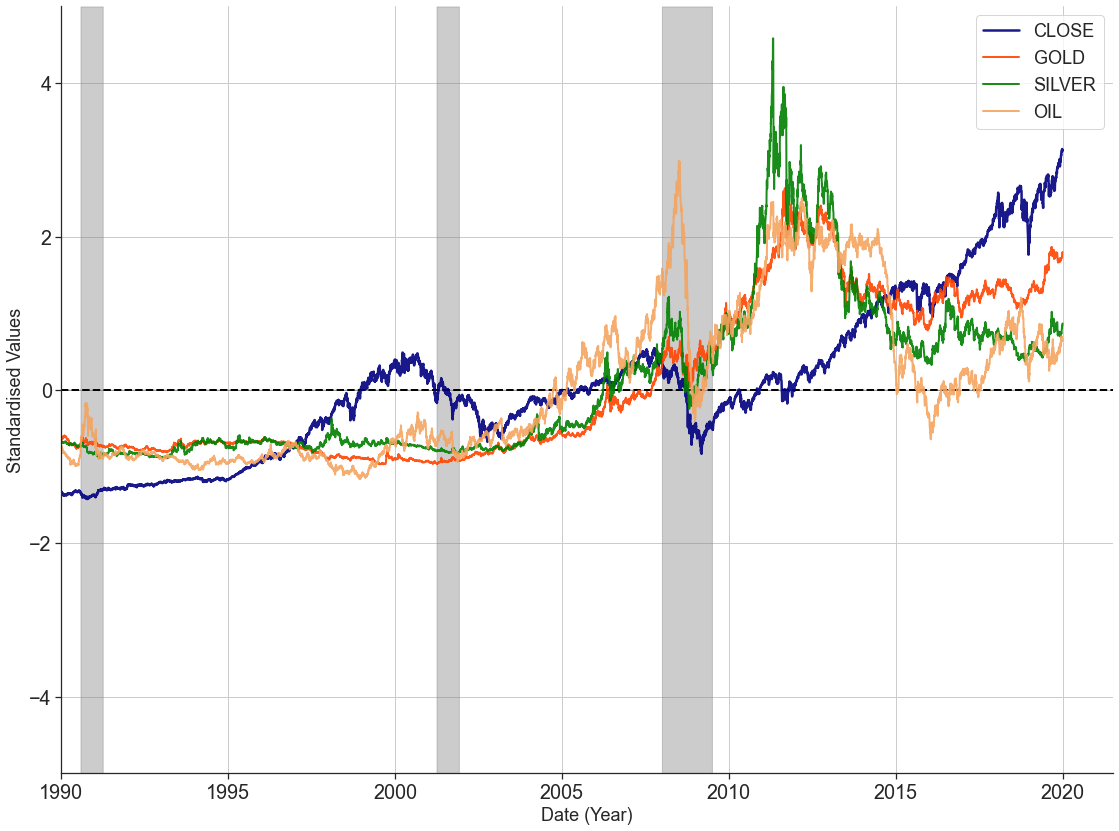

In [94]:
## S&P 500 vs Commodities
commodity_list = ["close", "gold", "silver", "oil"]
compare_graph(commodity_list)

Analysis:
- There seems to be a weak pattern of commodity prices being higher than the stock price when the economy is recovering from the recession, and the stock price being higher than commodity prices once the economy seems to have recovered.
- All commodity prices follow a similar general trend as each other.

#### 2.3.4 Comparison Against Economic Indicators

<Figure size 432x288 with 0 Axes>

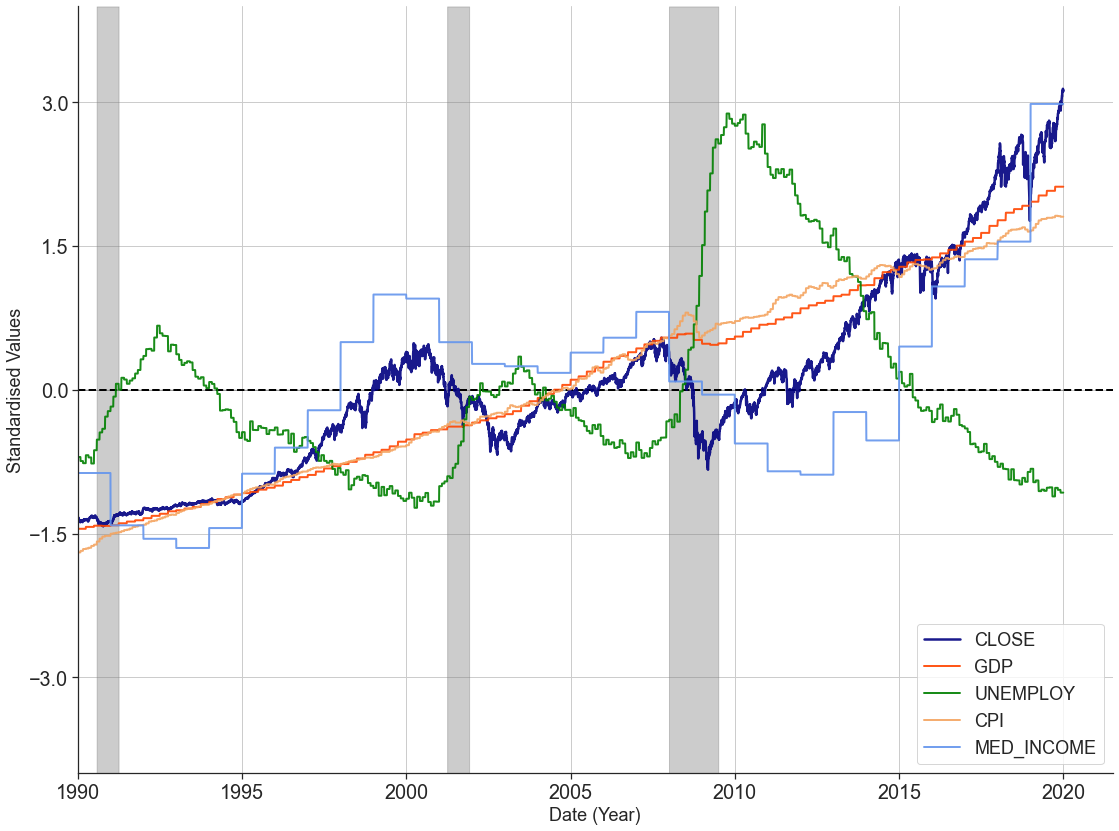

In [95]:
## S&P 500 vs Economic Indicators
economy_list = ["close", "gdp", "unemploy", "cpi", "med_income"]
compare_graph(economy_list)

Analysis:
- GDP and CPI both follow the upward trend as the stock price.
- Unemployment seems to have a clear negative correlation with the stock price. It is generally higher than the stock price during weak economic periods, and vice versa during strong economic periods.
- Median income generally follows the same pattern as the stock price.

#### 2.3.5 Comparison Against Volatility and Sentiments

<Figure size 432x288 with 0 Axes>

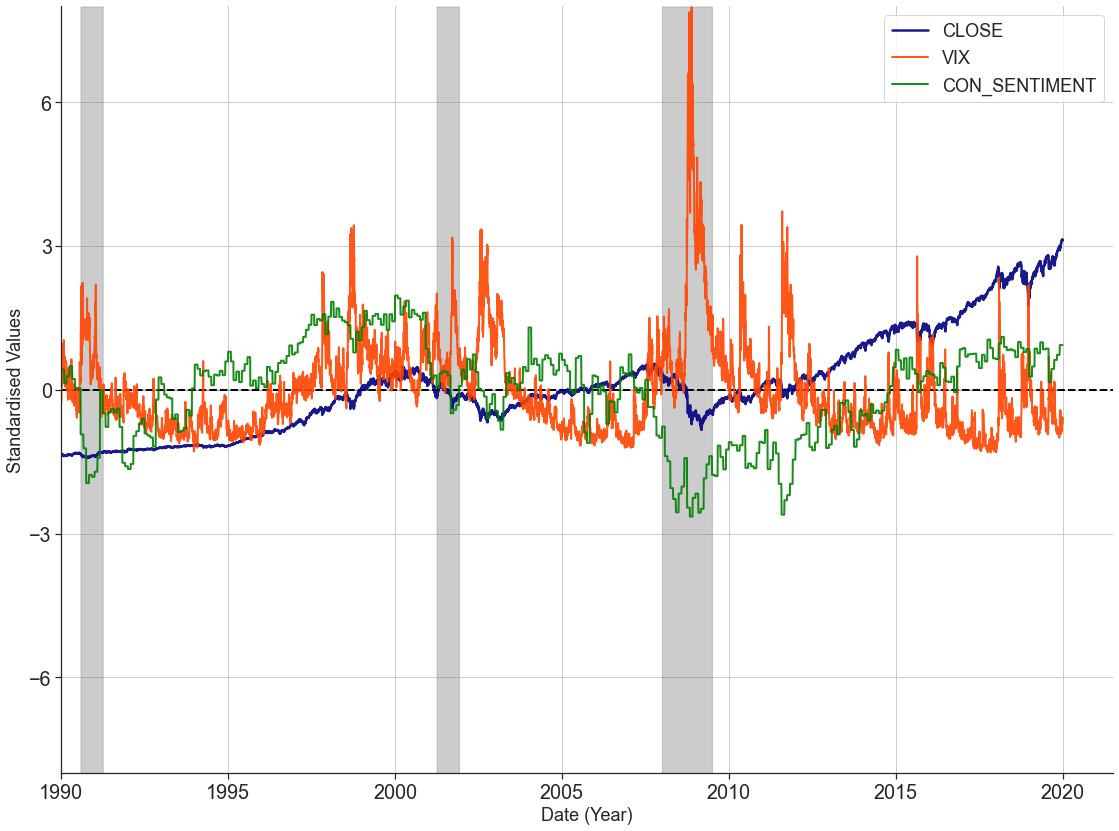

In [96]:
## S&P 500 vs Sentiments and Volatility
sentiment_list = ["close", "vix", "con_sentiment"]
compare_graph(sentiment_list)

Analysis:
- The pattern observed in the consumer sentiment somewhat resembles that of S&P 500.
- For VIX, there are times when it seems to be negatively correlated to S&P 500 and sometimes it is positively correlated. It is unclear if there is a clear correlation between the two.

<Figure size 432x288 with 0 Axes>

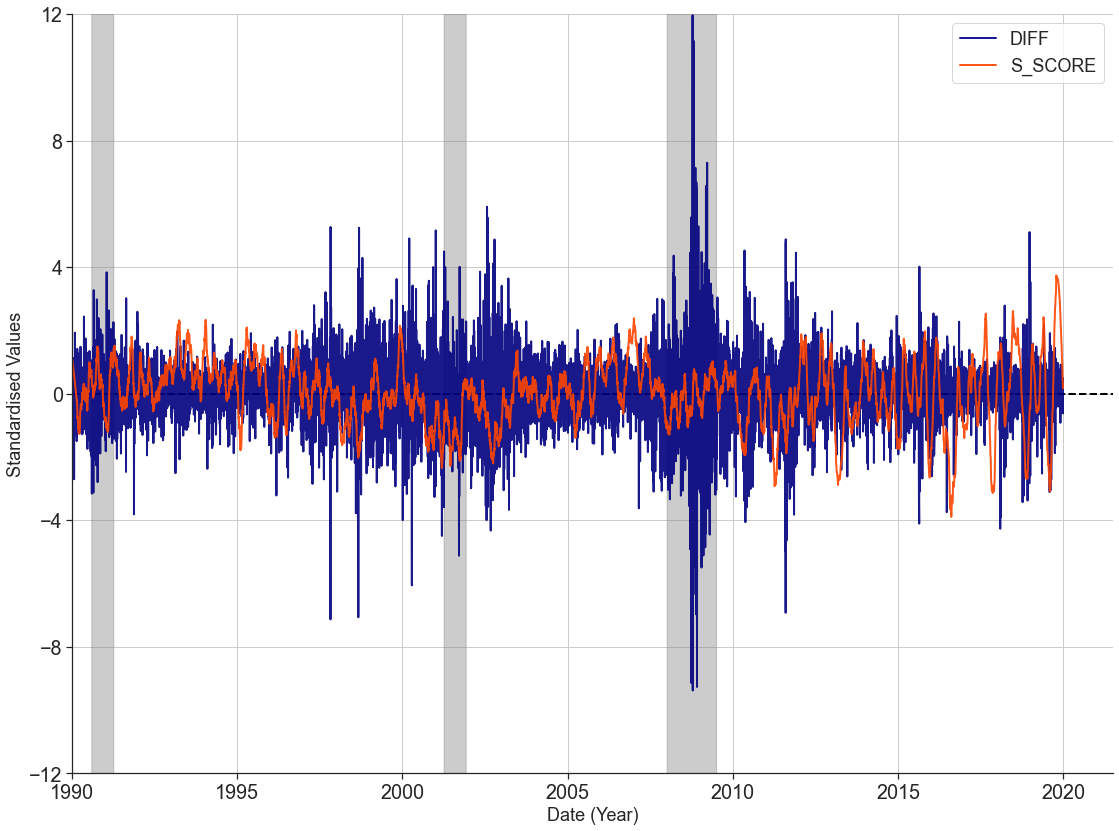

In [97]:
diff = df.close.pct_change() * 100
diff = diff.fillna(0)
diff = np.array(diff)

scaled = scaler.fit_transform(diff.reshape(-1, 1))
df_scaled["diff"] = scaled

sentiment_list = ["diff", "s_score"]
compare_graph(sentiment_list)

Analysis:
- It is unclear if there is any distinct correlation between daily changes in news article sentiment and daily changes in the stock price.
- It may have been better to use the raw scores rather than the labels as the indicator of news article sentiment.

### 2.4 Correlation Between Parameters

In [98]:
### Present the data based on the highest correlation, and lowest correlation features.

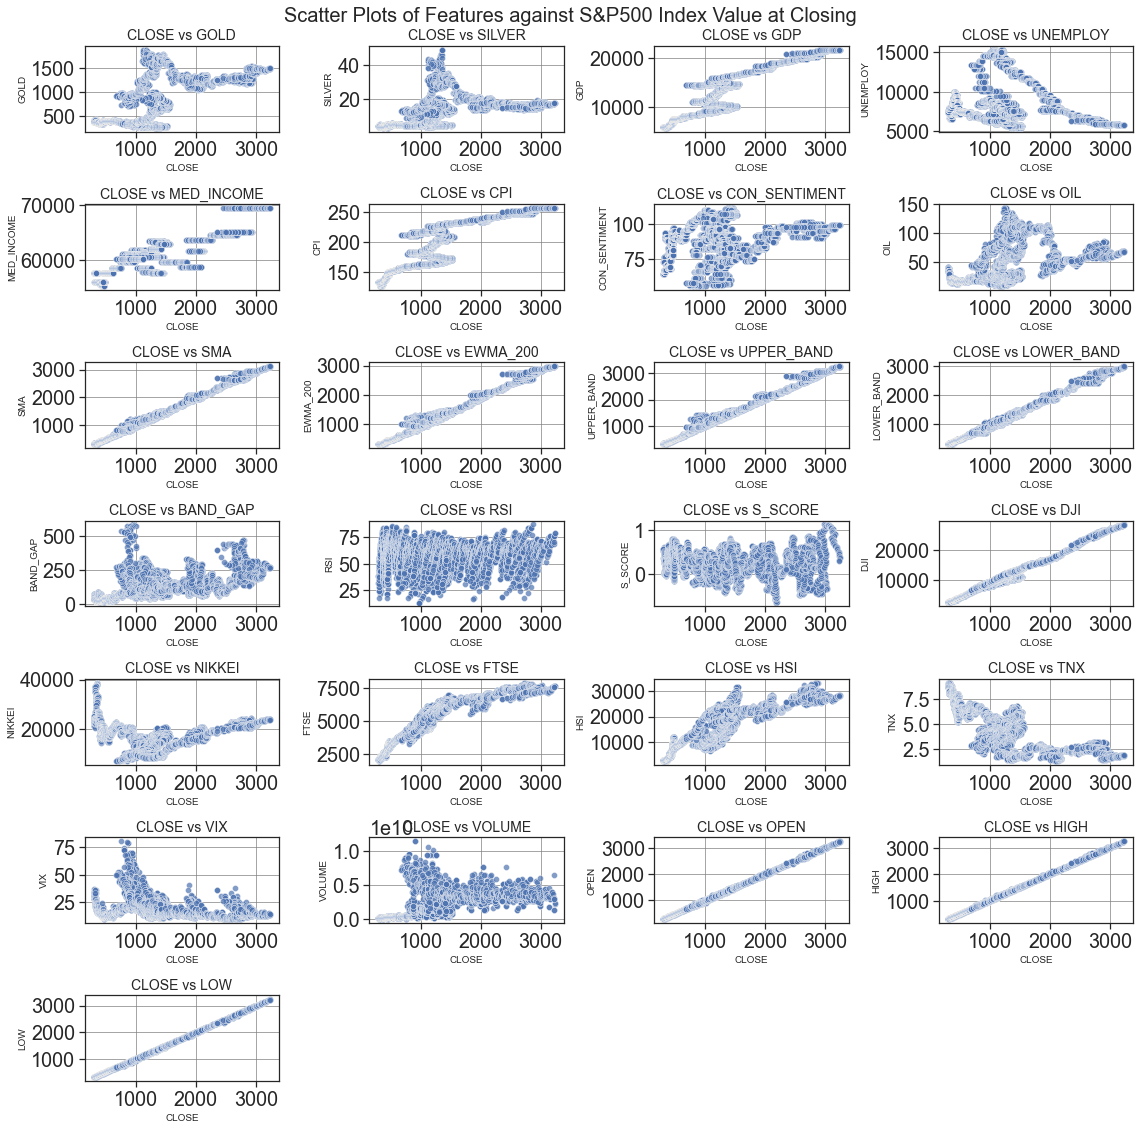

In [99]:
col_names = df.columns
nrow = int(len(col_names)/4) + 1
ncol = 4
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 16))
plt.rcParams['font.size'] = 10
fig.suptitle(f"Scatter Plots of Features against S&P500 Index Value at Closing",
              fontsize = 20)

for i in range(len(col_names)):
    ax = plt.subplot(nrow, ncol, i+1)    
    sns.set(font_scale = 1)
    sns.scatterplot(ax=ax,
                    x="close", 
                    y=col_names[i], 
                    data = df,
                    alpha = .7)

    ax.grid(alpha = 0.7, color='gray')
    ax.set_xlabel(f"CLOSE", fontsize = 10)
    ax.set_ylabel(f"{col_names[i].upper()}", fontsize = 10)
    plt.title(f"CLOSE vs {col_names[i].upper()}", fontsize = 14)

fig.delaxes(plt.subplot(nrow,ncol,26))
fig.delaxes(plt.subplot(nrow,ncol,27))
fig.delaxes(plt.subplot(nrow,ncol,28))

plt.subplots_adjust(hspace=0.9)

plt.show() 

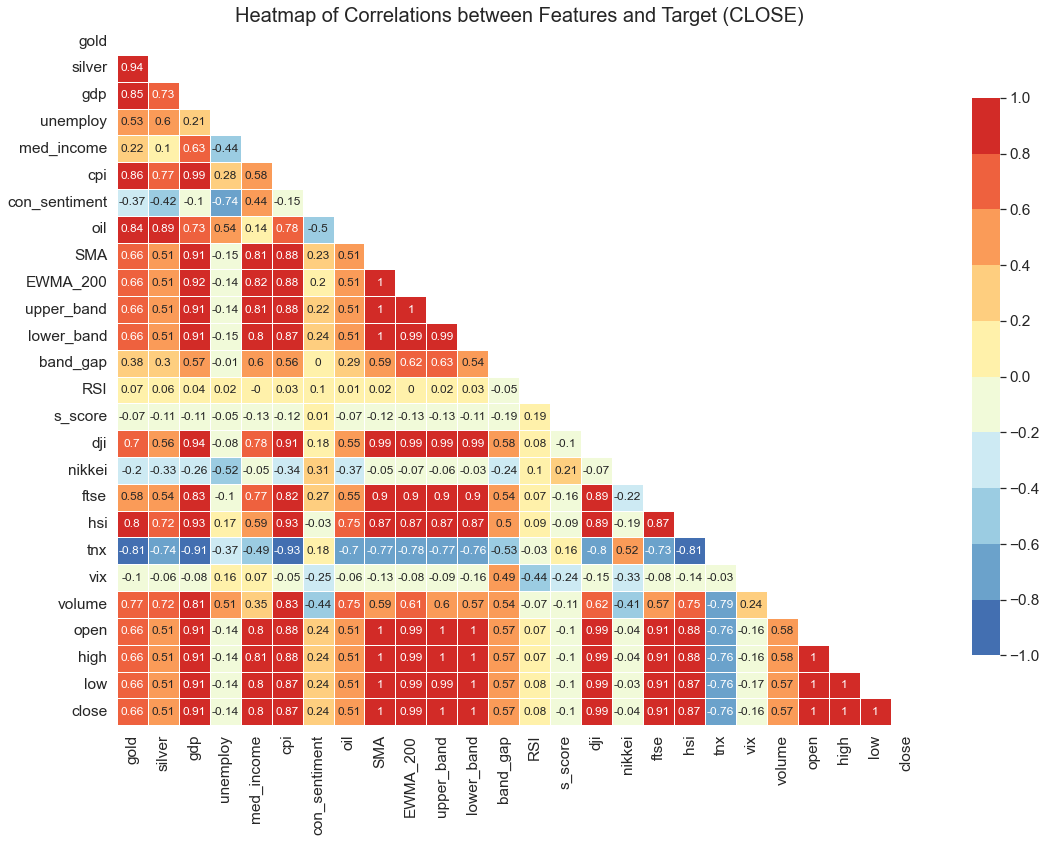

In [100]:

mask = np.zeros_like(df[col_names].corr())
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16,12))

    my_colors = sns.color_palette("RdYlBu_r", 10)
    my_cmap = ListedColormap(my_colors)
    bounds = np.linspace(-1,1,11)
    my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))

    plt.title("Heatmap of Correlations between Features and Target (CLOSE)", fontsize = 20)
    sns.heatmap(round(df[col_names].corr(), 2),
                cmap=my_cmap,
                norm=my_norm,
                annot=True,
                annot_kws=dict(fontsize = 12),
                cbar_kws=dict(ticks=bounds, shrink=0.8, location = "right"),
                linewidths=.5,
                mask = mask)

plt.show()

Analysis:
- Silver and gold have a very strong correlation (0.94)
- GDP and CPI have a very strong correlation (0.99)
- DJI and other technical indicators have a very strong correlation (0.99)
<br><br>
Incorporating all of these features for supervised machine learning (i.e. linear regression model) may lead to poor predictions due to multicolinearity. Therefore, we will exclude __silver__, __CPI__ and __DJI__ from the training features for machine learning.

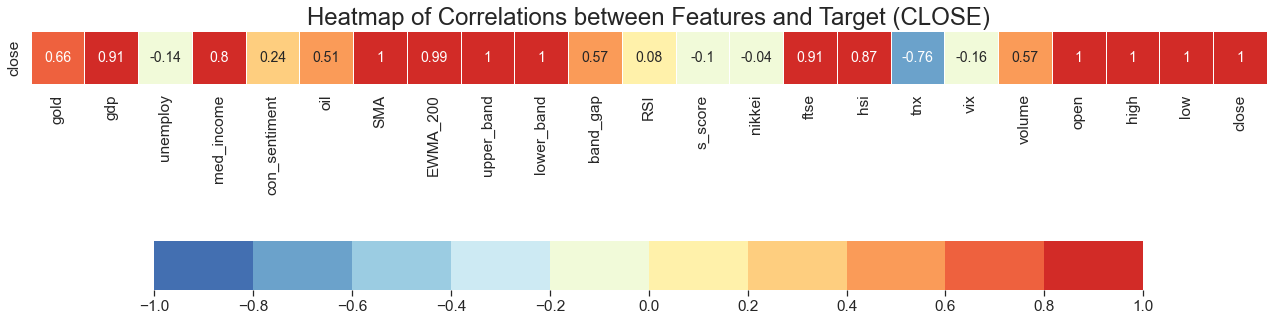

In [101]:
columns = list(df.columns)
columns = [col for col in columns if col not in ["silver", "cpi", "dji"]]
corr = []
sns.set(font_scale=1.4)

for col in columns:
    corr.append(round(df.close.corr(df[col]),2))

temp = pd.DataFrame(corr, index = columns, columns = ["close"])

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18,15))

    my_colors = sns.color_palette("RdYlBu_r", 10)
    my_cmap = ListedColormap(my_colors)
    bounds = np.linspace(-1,1,11)
    my_norm = BoundaryNorm(bounds, ncolors=len(my_colors))
    
    plt.title("Heatmap of Correlations between Features and Target (CLOSE)", fontsize = 24)
    sns.heatmap(temp.T,
                cmap=my_cmap,
                norm=my_norm,
                annot=True,
                annot_kws={"fontsize": 14},
                cbar_kws=dict(ticks=bounds, shrink=0.8, orientation = "horizontal"),
                linewidths=.5,
                square=True)

    plt.tight_layout()
    plt.show()

Analysis:
- RSI and Nikkei both have very weak correlation to S&P 500 (less than 0.1) so these features will also be excluded from the final training features.
- Other than technical indicators, S&P 500 is most strongly correlated to __GDP__, __FTSE__, __HSI__, and __median income__ (>= 0.8).
- S&P 500 is negatively correlated to __TNX__, __VIX__, and __unemployment__.

### 2.5 Serial Dependence - Lag Plots & Partial Autocorrelation

In [102]:
## Helper Functions Lag Plots
def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

In [114]:
def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    
    return fig

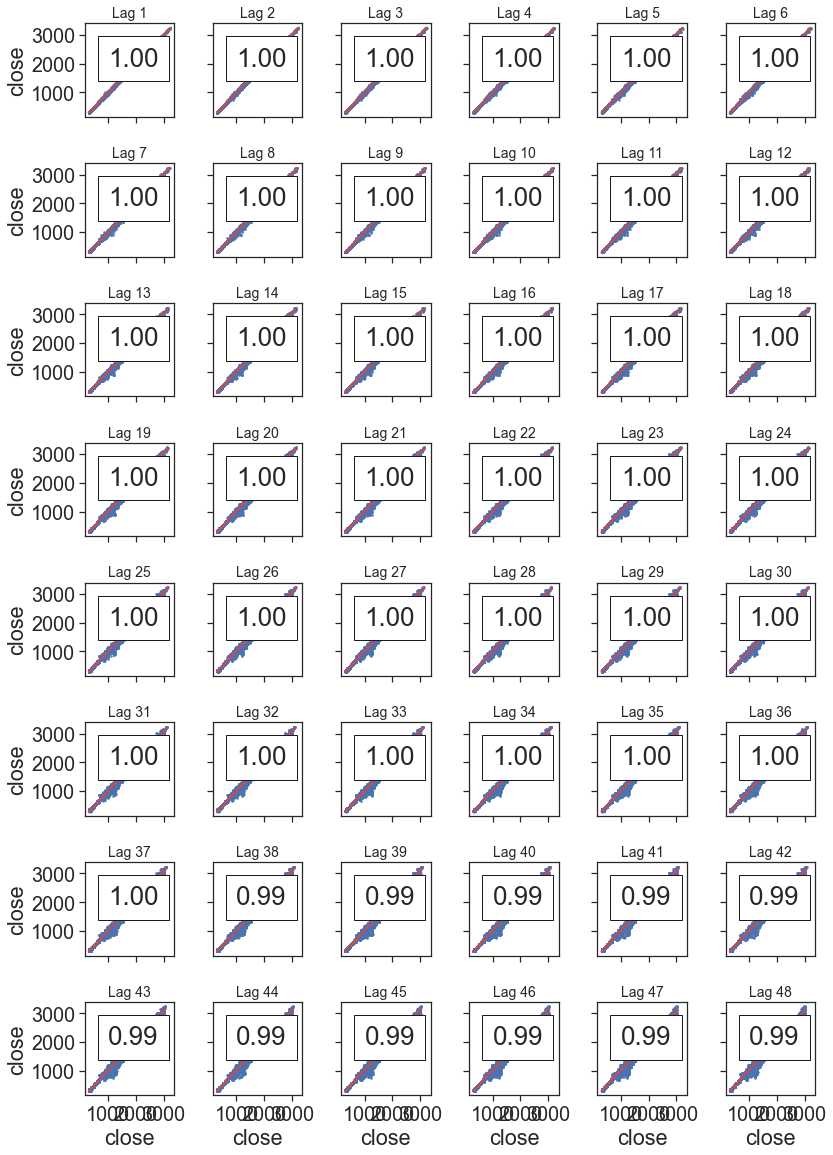

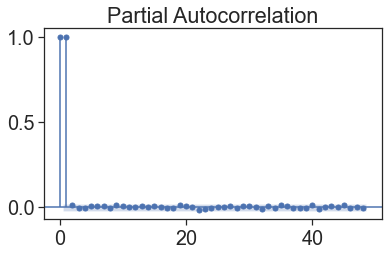

In [122]:
## Plotting Lag Plots and Partial Autocorrelation
_ = plot_lags(df.close, lags=48, nrows=8)
_ = plot_pacf(df.close, lags=48)

Analysis:
- Autocorrelation remains at 1.0 up to lag of 37.
- It seems lag features from lag 3 onwards are within the interval of "no correlation" (blue), so we will choose lags 1 and 2 as our features.

### 2.6 Final Figures for Presentation Based on Correlations

<Figure size 432x288 with 0 Axes>

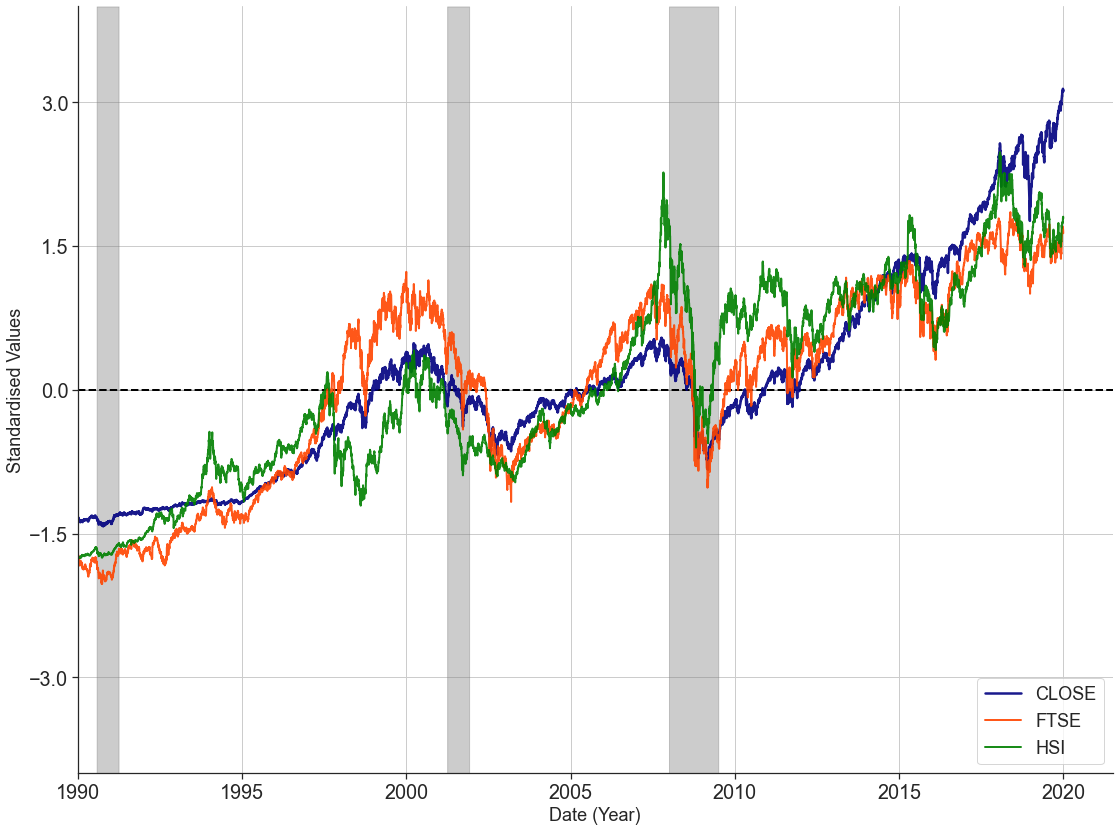

In [112]:
## S&P 500 vs Major Indices
commodity_list = ["close", "ftse", "hsi"]
compare_graph(commodity_list)


<Figure size 432x288 with 0 Axes>

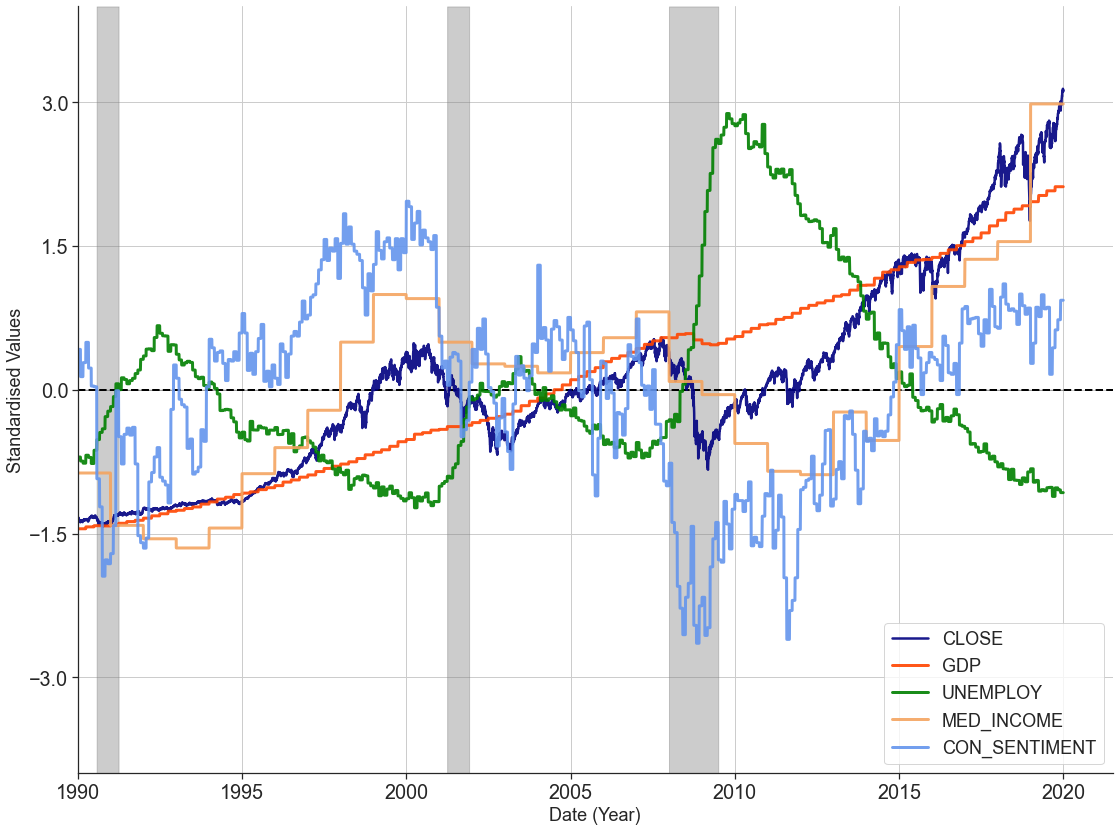

In [123]:
## S&P 500 vs Economic Indicators
commodity_list = ["close", "gdp", "unemploy", "med_income", "con_sentiment"]
compare_graph(commodity_list, lw = 3)

<Figure size 432x288 with 0 Axes>

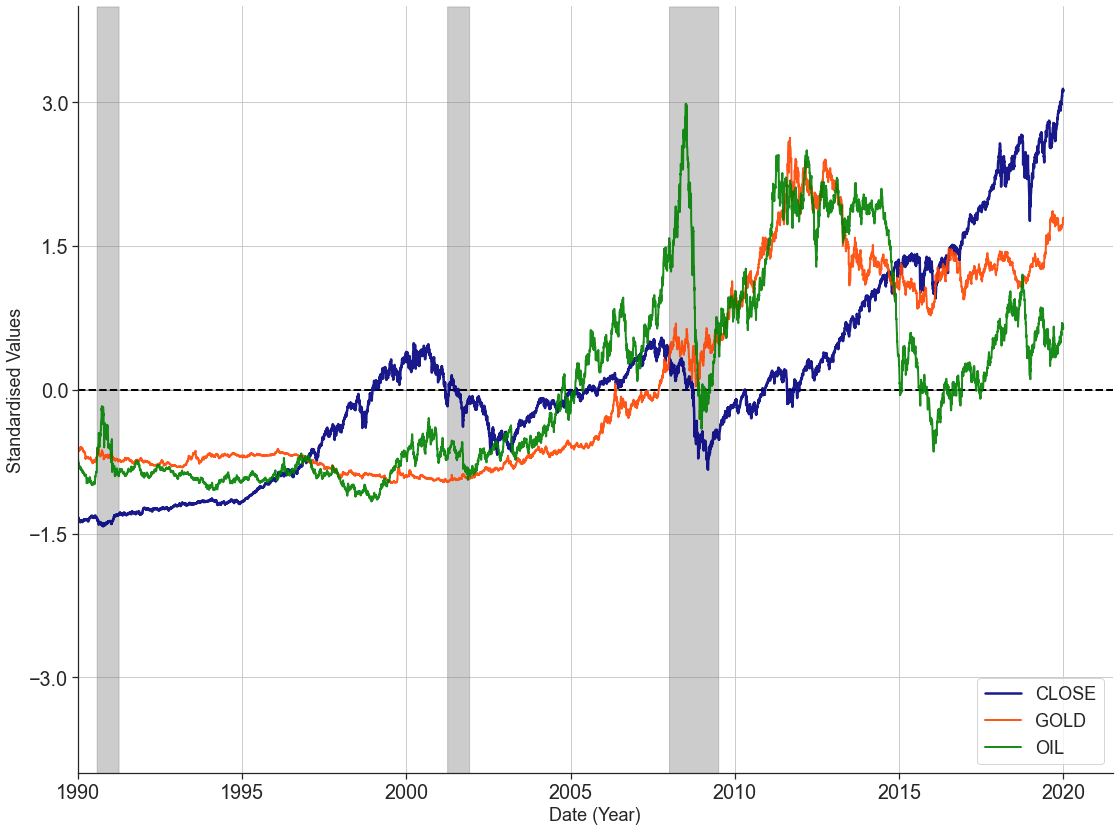

In [107]:
## S&P 500 vs Commodities
commodity_list = ["close", "gold", "oil"]
compare_graph(commodity_list)

## 3. Export the Final Dataframe for Machine Learning

In [118]:
columns = [col for col in df.columns if col not in ["silver", "cpi", "dji", "rsi", "nikkei"]]

In [119]:
df_copy = df[columns]

In [120]:
df_copy

gold        gdp  unemploy  med_income  con_sentiment    oil  \
1990-01-01   398.60   5872.701    6752.0     57677.0           93.0  21.20   
1990-01-02   399.00   5872.701    6752.0     57677.0           93.0  21.20   
1990-01-03   395.00   5872.701    6752.0     57677.0           93.0  22.65   
1990-01-04   396.50   5872.701    6752.0     57677.0           93.0  22.50   
1990-01-05   405.00   5872.701    6752.0     57677.0           93.0  23.13   
...             ...        ...       ...         ...            ...    ...   
2019-12-25  1482.10  21694.458    5861.0     69560.0           99.3  69.26   
2019-12-26  1482.10  21694.458    5861.0     69560.0           99.3  69.26   
2019-12-27  1511.50  21694.458    5861.0     69560.0           99.3  68.91   
2019-12-30  1514.75  21694.458    5861.0     69560.0           99.3  68.30   
2019-12-31  1514.75  21694.458    5861.0     69560.0           99.3  67.77   

                    SMA     EWMA_200   upper_band   lower_band  ...   s_score  \
1990-01-01   344.046799   331.337663   355.562514   332.531083  ...  0.518557   
1990-01-02   344.046799   331.337663   355.562514   332.531083  ...  0.513476   
1990-01-03   344.278799   331.610522   356.496513   332.061084  ...  0.508329   
1990-01-04   344.495599   331.849920   357.130810   331.860389  ...  0.503116   
1990-01-05   344.665599   332.052408   357.484510   331.846689  ...  0.497839   
...                 ...          ...          ...          ...  ...       ...   
2019-12-25  3100.961187  2969.966261  3232.986725  2968.935648  ...  0.422632   
2019-12-26  3105.845786  2972.652267  3240.026973  2971.664599  ...  0.393313   
2019-12-27  3110.852388  2975.312643  3246.020757  2975.684018  ...  0.363569   
2019-12-30  3115.319189  2977.760179  3250.019273  2980.619106  ...  0.333411   
2019-12-31  3120.210791  2980.277790  3253.529013  2986.892569  ...  0.302852   

                   ftse           hsi    tnx        vix        volume  \
1990-01-01  2434.100098   2838.100098  7.940  17.240000  1.620700e+08   
1990-01-02  2434.100098   2838.100098  7.940  17.240000  1.620700e+08   
1990-01-03  2463.699951   2858.699951  7.990  18.190001  1.923300e+08   
1990-01-04  2451.600098   2868.000000  7.980  19.219999  1.770000e+08   
1990-01-05  2444.500000   2839.899902  7.990  20.110001  1.585300e+08   
...                 ...           ...    ...        ...           ...   
2019-12-25  7632.200195  27864.210938  1.910  12.670000  1.296540e+09   
2019-12-26  7632.200195  27864.210938  1.905  12.650000  2.160680e+09   
2019-12-27  7644.899902  28225.419922  1.874  13.430000  2.428670e+09   
2019-12-30  7587.100098  28319.390625  1.895  14.820000  3.013290e+09   
2019-12-31  7542.399902  28189.750000  1.919  13.780000  2.893810e+09   

                   open         high          low        close  
1990-01-01   353.399994   359.690002   351.980011   359.690002  
1990-01-02   353.399994   359.690002   351.980011   359.690002  
1990-01-03   359.690002   360.589996   357.890015   358.760010  
1990-01-04   358.760010   358.760010   352.890015   355.670013  
1990-01-05   355.670013   355.670013   351.350006   352.200012  
...                 ...          ...          ...          ...  
2019-12-25  3225.449951  3226.429932  3220.510010  3223.379883  
2019-12-26  3227.199951  3240.080078  3227.199951  3239.909912  
2019-12-27  3247.229980  3247.929932  3234.370117  3240.020020  
2019-12-30  3240.090088  3240.919922  3216.570068  3221.290039  
2019-12-31  3215.179932  3231.719971  3212.030029  3230.780029  

[9757 rows x 22 columns]

In [121]:
df_copy.to_pickle("df_copy.pkl") 